In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline

In [2]:
root_folder = '../data'

In [3]:
inn_list = pd.read_csv(os.path.join(root_folder,'inn_list.csv'),sep = ';')
contract_info = pd.read_csv(os.path.join(root_folder,'contract_main_info.csv'),sep = ';')
contract_item_info = pd.read_csv(os.path.join(root_folder,'contract_item_info.csv'),sep = ';')

In [41]:
contract_info

,id_contract,id_procedure,customer_inn,customer_kpp,protocol_date,sign_date,min_publish_date,contract_subject,contract_price_rub,advance_sum_percents,subcontractor_sum_percents,execution_start_date,execution_end_date,enforcement_type,enforcement_amount_rub,supplier_inn,supplier_kpp
0,11694128,NaN,7309900546,730901001,NaN,2019-09-23,2019-09-30,Электроэнергия,120603.88,NaN,NaN,2019-09-23,2019-09-30,NaN,NaN,7.327012e+09,732701001.0
1,6476238,NaN,2221037355,222101001,NaN,2019-03-25,2019-03-26,NaN,66536.52,NaN,NaN,2019-01-01,2019-12-31,NaN,NaN,2.225164e+09,222501001.0
2,8685287,NaN,3329010657,332901001,NaN,2019-03-26,2019-03-27,NaN,330000.00,NaN,NaN,2019-03-26,2020-01-18,NaN,NaN,7.704440e+09,332701001.0
3,9127977,NaN,2221037355,222101001,NaN,2019-04-29,2019-04-30,NaN,36913.34,NaN,NaN,2019-02-01,2019-12-31,NaN,NaN,2.225164e+09,222501001.0
4,7086116,NaN,2221037355,222101001,NaN,2019-05-06,2019-05-07,NaN,18308.07,NaN,NaN,2019-02-01,2019-12-31,NaN,NaN,2.224181e+09,222401001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634440,9594777,5283937.0,4444444424,444444424,2017-11-14,2019-09-15,2019-11-23,NaN,25000.00,NaN,NaN,2019-09-16,2019-11-30,NaN,NaN,7.830003e+09,781001001.0
2634441,9414478,5283937.0,4444444424,444444424,2017-11-14,2019-09-15,2019-11-09,NaN,25000.00,NaN,NaN,2019-09-16,2019-11-30,NaN,NaN,7.830003e+09,781001001.0
2634442,9987854,5283937.0,4444444424,444444424,2017-11-14,2019-09-15,2019-12-14,NaN,25000.00,NaN,NaN,2019-09-16,2019-11-30,NaN,NaN,7.830003e+09,781001001.0
2634443,9988008,5283937.0,4444444424,444444424,2017-11-14,2019-09-15,2019-12-14,NaN,25000.00,NaN,NaN,2019-09-16,2019-11-30,NaN,NaN,7.830003e+09,781001001.0


In [4]:
contract_termination = pd.read_csv(os.path.join(root_folder,'contract_termination.csv'),sep = ';')

In [5]:
contract_improper = pd.read_csv(os.path.join(root_folder,'contract_improper_execution.csv'),sep = ';')

In [6]:
untrustworthy_supplier = pd.read_csv(os.path.join(root_folder,'rnp.csv'),sep = ';')
untrustworthy_supplier['untrustworthy_flag'] = 1
untrustworthy_supplier['supplier_inn'] = untrustworthy_supplier['inn']

In [7]:
bo_balance = pd.read_csv(os.path.join(root_folder,'bo_balance.csv'),sep = ';')

In [8]:
participation_stat = pd.read_csv(os.path.join(root_folder,'participation_statistic.csv'),sep = ';')
participation_stat['winrate'] = participation_stat['win_qty']/participation_stat['procedure_qty']

In [9]:
participation_stat['supplier_inn'] = participation_stat['participant_inn']
participation_stat.drop_duplicates(subset='participant_inn',inplace = True)

In [10]:
msp_registry = pd.read_csv(os.path.join(root_folder,'msp_reestr.csv'),sep = ';')
msp_registry.head()

,inn,msp_reestr_inclusion_date,msp_type,msp_category
0,610207254533,2018-04-10,2,1
1,7805305689,2016-08-01,1,1
2,381800337364,2019-03-10,2,1
3,590426109054,2017-02-10,2,1
4,2130165832,2016-08-01,1,1


In [11]:
egrul_info = pd.read_csv(os.path.join(root_folder,'egrul_info.csv'),sep = ';')
egrul_info['capital_size'] = pd.to_numeric(egrul_info['capital_size'], errors='coerce')
egrul_info['log_capital'] = np.log10(1+egrul_info['capital_size'].astype('float'))

In [12]:
contract_df = contract_info.copy()

In [13]:
contract_df['log_price'] = np.log10(1+contract_df['contract_price_rub'])

In [14]:
contract_df = contract_df.merge(contract_item_info, on='id_contract')
# remove the duplicates created by the merge
contract_df = contract_df.drop_duplicates(subset='id_contract')

In [15]:
contract_df = contract_df.merge(contract_item_info, on='id_contract')

In [16]:
contract_df = contract_df.merge(contract_termination, on='id_contract',how = 'left')
# remove the duplicates created by the merge
contract_df = contract_df.drop_duplicates(subset='id_contract')

In [17]:
contract_df = contract_df.merge(participation_stat, on='supplier_inn',how = 'left')


In [18]:
contract_df = contract_df.merge(untrustworthy_supplier[['supplier_inn','untrustworthy_flag']], on='supplier_inn',how = 'left')


In [19]:
contract_df['untrustworthy_flag'].fillna(0,inplace = True)

In [20]:
contract_df['t_reason_name'].fillna('Выполнен',inplace = True)

In [30]:
contract_train = pd.concat([contract_df[contract_df['t_reason_name']=='Выполнен'].sample(100000),contract_df[contract_df['t_reason_name']!='Выполнен'].sample(100000)])

In [31]:
drop_cols = ['t_termination_date','tru_okpd2_code_x','min_publish_date','execution_end_date','execution_start_date','protocol_date','sign_date','t_reason_info','id_contract','id_procedure']
contract_train = contract_train.drop(columns = drop_cols)
contract_label = contract_train['t_reason_name']
contract_label = contract_label=='Выполнен'
contract_train = contract_train.drop(columns = ['t_reason_name'])


In [32]:
contract_label

2392775     True
1857559     True
425402      True
1692117     True
3006118     True
           ...  
2858691    False
2528158    False
2477339    False
2295332    False
896932     False
Name: t_reason_name, Length: 200000, dtype: bool

In [33]:
contract_train.fillna(-1,inplace = True)

In [34]:
cat_features = ['contract_subject','enforcement_type','tru_okpd2_code_y','fz']
numerical_features = ['customer_inn','customer_kpp','contract_price_rub','advance_sum_percents','subcontractor_sum_percents','enforcement_amount_rub','supplier_inn',
               'supplier_kpp','log_price']

In [35]:
for feat in numerical_features:
    contract_train[feat] = pd.to_numeric(contract_train[feat], errors='coerce')

In [36]:
from catboost import cv,Pool

params = {
    'loss_function': 'MultiClass',
    'eval_metric': 'Accuracy',
    'iterations': 1000,
    'random_seed': 63,
    'learning_rate': 0.02,
}

cv_data = cv(
    params=params,
    pool=Pool(contract_train, label=contract_label, cat_features=cat_features),
    fold_count=5, # Разбивка выборки на 5 кусочков
    shuffle=True, # Перемешаем наши данные
    partition_random_seed=0,
    stratified=True, 
    verbose=True
)

Training on fold [0/5]
0:	learn: 0.7229937	test: 0.7255500	best: 0.7255500 (0)	total: 163ms	remaining: 2m 42s
1:	learn: 0.7265438	test: 0.7314500	best: 0.7314500 (1)	total: 242ms	remaining: 2m
2:	learn: 0.7368313	test: 0.7417500	best: 0.7417500 (2)	total: 348ms	remaining: 1m 55s
3:	learn: 0.7296812	test: 0.7342750	best: 0.7417500 (2)	total: 406ms	remaining: 1m 41s
4:	learn: 0.7377750	test: 0.7428000	best: 0.7428000 (4)	total: 498ms	remaining: 1m 39s
5:	learn: 0.7353437	test: 0.7403000	best: 0.7428000 (4)	total: 551ms	remaining: 1m 31s
6:	learn: 0.7382000	test: 0.7434000	best: 0.7434000 (6)	total: 623ms	remaining: 1m 28s
7:	learn: 0.7387500	test: 0.7440500	best: 0.7440500 (7)	total: 679ms	remaining: 1m 24s
8:	learn: 0.7383937	test: 0.7433750	best: 0.7440500 (7)	total: 744ms	remaining: 1m 21s
9:	learn: 0.7393563	test: 0.7447250	best: 0.7447250 (9)	total: 797ms	remaining: 1m 18s
10:	learn: 0.7395125	test: 0.7446500	best: 0.7447250 (9)	total: 843ms	remaining: 1m 15s
11:	learn: 0.7396000	te

100:	learn: 0.7436750	test: 0.7492750	best: 0.7492750 (100)	total: 4.25s	remaining: 37.8s
101:	learn: 0.7438187	test: 0.7493750	best: 0.7493750 (101)	total: 4.27s	remaining: 37.6s
102:	learn: 0.7439500	test: 0.7495000	best: 0.7495000 (102)	total: 4.3s	remaining: 37.5s
103:	learn: 0.7439687	test: 0.7495500	best: 0.7495500 (103)	total: 4.34s	remaining: 37.4s
104:	learn: 0.7440500	test: 0.7495750	best: 0.7495750 (104)	total: 4.38s	remaining: 37.4s
105:	learn: 0.7442500	test: 0.7495750	best: 0.7495750 (104)	total: 4.43s	remaining: 37.3s
106:	learn: 0.7442813	test: 0.7496000	best: 0.7496000 (106)	total: 4.46s	remaining: 37.2s
107:	learn: 0.7443812	test: 0.7496250	best: 0.7496250 (107)	total: 4.5s	remaining: 37.2s
108:	learn: 0.7443937	test: 0.7496750	best: 0.7496750 (108)	total: 4.56s	remaining: 37.3s
109:	learn: 0.7444125	test: 0.7498750	best: 0.7498750 (109)	total: 4.6s	remaining: 37.2s
110:	learn: 0.7444875	test: 0.7499000	best: 0.7499000 (110)	total: 4.66s	remaining: 37.3s
111:	learn: 0

193:	learn: 0.7481750	test: 0.7545250	best: 0.7547000 (190)	total: 8.59s	remaining: 35.7s
194:	learn: 0.7481375	test: 0.7546000	best: 0.7547000 (190)	total: 8.65s	remaining: 35.7s
195:	learn: 0.7481625	test: 0.7546750	best: 0.7547000 (190)	total: 8.68s	remaining: 35.6s
196:	learn: 0.7482000	test: 0.7546750	best: 0.7547000 (190)	total: 8.73s	remaining: 35.6s
197:	learn: 0.7482188	test: 0.7546500	best: 0.7547000 (190)	total: 8.78s	remaining: 35.6s
198:	learn: 0.7481688	test: 0.7546000	best: 0.7547000 (190)	total: 8.83s	remaining: 35.6s
199:	learn: 0.7481437	test: 0.7546000	best: 0.7547000 (190)	total: 8.87s	remaining: 35.5s
200:	learn: 0.7481688	test: 0.7545500	best: 0.7547000 (190)	total: 8.91s	remaining: 35.4s
201:	learn: 0.7482500	test: 0.7546750	best: 0.7547000 (190)	total: 8.96s	remaining: 35.4s
202:	learn: 0.7482250	test: 0.7546750	best: 0.7547000 (190)	total: 9.01s	remaining: 35.4s
203:	learn: 0.7483250	test: 0.7547750	best: 0.7547750 (203)	total: 9.07s	remaining: 35.4s
204:	learn

288:	learn: 0.7502000	test: 0.7561250	best: 0.7561750 (287)	total: 13.3s	remaining: 32.6s
289:	learn: 0.7502500	test: 0.7561250	best: 0.7561750 (287)	total: 13.3s	remaining: 32.6s
290:	learn: 0.7503062	test: 0.7562000	best: 0.7562000 (290)	total: 13.4s	remaining: 32.6s
291:	learn: 0.7503062	test: 0.7562000	best: 0.7562000 (290)	total: 13.4s	remaining: 32.5s
292:	learn: 0.7503125	test: 0.7561750	best: 0.7562000 (290)	total: 13.4s	remaining: 32.4s
293:	learn: 0.7503375	test: 0.7563000	best: 0.7563000 (293)	total: 13.5s	remaining: 32.4s
294:	learn: 0.7503062	test: 0.7562250	best: 0.7563000 (293)	total: 13.5s	remaining: 32.3s
295:	learn: 0.7503437	test: 0.7562500	best: 0.7563000 (293)	total: 13.6s	remaining: 32.3s
296:	learn: 0.7503250	test: 0.7562500	best: 0.7563000 (293)	total: 13.6s	remaining: 32.2s
297:	learn: 0.7503188	test: 0.7562750	best: 0.7563000 (293)	total: 13.7s	remaining: 32.2s
298:	learn: 0.7503313	test: 0.7562500	best: 0.7563000 (293)	total: 13.7s	remaining: 32.2s
299:	learn

384:	learn: 0.7518187	test: 0.7572250	best: 0.7575000 (328)	total: 18.4s	remaining: 29.3s
385:	learn: 0.7517875	test: 0.7572250	best: 0.7575000 (328)	total: 18.4s	remaining: 29.3s
386:	learn: 0.7517938	test: 0.7571750	best: 0.7575000 (328)	total: 18.4s	remaining: 29.2s
387:	learn: 0.7518063	test: 0.7571500	best: 0.7575000 (328)	total: 18.5s	remaining: 29.2s
388:	learn: 0.7518563	test: 0.7571500	best: 0.7575000 (328)	total: 18.5s	remaining: 29.1s
389:	learn: 0.7517938	test: 0.7572500	best: 0.7575000 (328)	total: 18.6s	remaining: 29.1s
390:	learn: 0.7518250	test: 0.7571750	best: 0.7575000 (328)	total: 18.7s	remaining: 29.1s
391:	learn: 0.7518375	test: 0.7571250	best: 0.7575000 (328)	total: 18.7s	remaining: 29s
392:	learn: 0.7518500	test: 0.7572000	best: 0.7575000 (328)	total: 18.8s	remaining: 29s
393:	learn: 0.7518438	test: 0.7572500	best: 0.7575000 (328)	total: 18.8s	remaining: 28.9s
394:	learn: 0.7519062	test: 0.7573000	best: 0.7575000 (328)	total: 18.9s	remaining: 28.9s
395:	learn: 0.

480:	learn: 0.7530562	test: 0.7586500	best: 0.7586500 (479)	total: 23.8s	remaining: 25.6s
481:	learn: 0.7530625	test: 0.7587500	best: 0.7587500 (481)	total: 23.8s	remaining: 25.6s
482:	learn: 0.7530625	test: 0.7587250	best: 0.7587500 (481)	total: 23.9s	remaining: 25.5s
483:	learn: 0.7530687	test: 0.7587000	best: 0.7587500 (481)	total: 23.9s	remaining: 25.5s
484:	learn: 0.7531187	test: 0.7588000	best: 0.7588000 (484)	total: 24s	remaining: 25.4s
485:	learn: 0.7531562	test: 0.7588000	best: 0.7588000 (484)	total: 24s	remaining: 25.4s
486:	learn: 0.7531875	test: 0.7588250	best: 0.7588250 (486)	total: 24.1s	remaining: 25.4s
487:	learn: 0.7531625	test: 0.7588500	best: 0.7588500 (487)	total: 24.1s	remaining: 25.3s
488:	learn: 0.7531625	test: 0.7589000	best: 0.7589000 (488)	total: 24.1s	remaining: 25.2s
489:	learn: 0.7532125	test: 0.7588750	best: 0.7589000 (488)	total: 24.2s	remaining: 25.2s
490:	learn: 0.7532062	test: 0.7589000	best: 0.7589000 (488)	total: 24.2s	remaining: 25.1s
491:	learn: 0.

573:	learn: 0.7541688	test: 0.7595000	best: 0.7595750 (572)	total: 28.8s	remaining: 21.4s
574:	learn: 0.7541750	test: 0.7595250	best: 0.7595750 (572)	total: 28.9s	remaining: 21.4s
575:	learn: 0.7542062	test: 0.7594750	best: 0.7595750 (572)	total: 29s	remaining: 21.3s
576:	learn: 0.7542000	test: 0.7594250	best: 0.7595750 (572)	total: 29.1s	remaining: 21.3s
577:	learn: 0.7541875	test: 0.7594500	best: 0.7595750 (572)	total: 29.1s	remaining: 21.3s
578:	learn: 0.7541937	test: 0.7593500	best: 0.7595750 (572)	total: 29.2s	remaining: 21.3s
579:	learn: 0.7542000	test: 0.7593250	best: 0.7595750 (572)	total: 29.3s	remaining: 21.2s
580:	learn: 0.7542562	test: 0.7593750	best: 0.7595750 (572)	total: 29.4s	remaining: 21.2s
581:	learn: 0.7542625	test: 0.7593500	best: 0.7595750 (572)	total: 29.6s	remaining: 21.2s
582:	learn: 0.7542562	test: 0.7593500	best: 0.7595750 (572)	total: 29.7s	remaining: 21.2s
583:	learn: 0.7543000	test: 0.7593750	best: 0.7595750 (572)	total: 29.8s	remaining: 21.2s
584:	learn: 

668:	learn: 0.7551562	test: 0.7601250	best: 0.7601750 (650)	total: 35.6s	remaining: 17.6s
669:	learn: 0.7551937	test: 0.7601500	best: 0.7601750 (650)	total: 35.7s	remaining: 17.6s
670:	learn: 0.7552062	test: 0.7601000	best: 0.7601750 (650)	total: 35.8s	remaining: 17.5s
671:	learn: 0.7552062	test: 0.7600500	best: 0.7601750 (650)	total: 35.8s	remaining: 17.5s
672:	learn: 0.7551937	test: 0.7601000	best: 0.7601750 (650)	total: 35.9s	remaining: 17.4s
673:	learn: 0.7552375	test: 0.7601000	best: 0.7601750 (650)	total: 35.9s	remaining: 17.4s
674:	learn: 0.7552813	test: 0.7601000	best: 0.7601750 (650)	total: 36s	remaining: 17.3s
675:	learn: 0.7553625	test: 0.7601250	best: 0.7601750 (650)	total: 36s	remaining: 17.3s
676:	learn: 0.7553375	test: 0.7601250	best: 0.7601750 (650)	total: 36.1s	remaining: 17.2s
677:	learn: 0.7553500	test: 0.7601000	best: 0.7601750 (650)	total: 36.2s	remaining: 17.2s
678:	learn: 0.7553750	test: 0.7600750	best: 0.7601750 (650)	total: 36.3s	remaining: 17.2s
679:	learn: 0.

760:	learn: 0.7564125	test: 0.7610500	best: 0.7611000 (758)	total: 41.8s	remaining: 13.1s
761:	learn: 0.7564188	test: 0.7610250	best: 0.7611000 (758)	total: 41.8s	remaining: 13.1s
762:	learn: 0.7564125	test: 0.7610750	best: 0.7611000 (758)	total: 41.9s	remaining: 13s
763:	learn: 0.7564875	test: 0.7610750	best: 0.7611000 (758)	total: 41.9s	remaining: 13s
764:	learn: 0.7564937	test: 0.7612250	best: 0.7612250 (764)	total: 42s	remaining: 12.9s
765:	learn: 0.7564688	test: 0.7612000	best: 0.7612250 (764)	total: 42.1s	remaining: 12.9s
766:	learn: 0.7564563	test: 0.7612250	best: 0.7612250 (764)	total: 42.1s	remaining: 12.8s
767:	learn: 0.7564688	test: 0.7611750	best: 0.7612250 (764)	total: 42.2s	remaining: 12.7s
768:	learn: 0.7564812	test: 0.7611750	best: 0.7612250 (764)	total: 42.2s	remaining: 12.7s
769:	learn: 0.7564812	test: 0.7612500	best: 0.7612500 (769)	total: 42.3s	remaining: 12.6s
770:	learn: 0.7564750	test: 0.7612500	best: 0.7612500 (769)	total: 42.4s	remaining: 12.6s
771:	learn: 0.75

855:	learn: 0.7575563	test: 0.7619750	best: 0.7622000 (843)	total: 47.6s	remaining: 8s
856:	learn: 0.7575688	test: 0.7618500	best: 0.7622000 (843)	total: 47.6s	remaining: 7.95s
857:	learn: 0.7575563	test: 0.7618750	best: 0.7622000 (843)	total: 47.7s	remaining: 7.89s
858:	learn: 0.7575437	test: 0.7621000	best: 0.7622000 (843)	total: 47.8s	remaining: 7.84s
859:	learn: 0.7575625	test: 0.7620250	best: 0.7622000 (843)	total: 47.8s	remaining: 7.79s
860:	learn: 0.7575750	test: 0.7620250	best: 0.7622000 (843)	total: 47.9s	remaining: 7.74s
861:	learn: 0.7575937	test: 0.7620250	best: 0.7622000 (843)	total: 48s	remaining: 7.68s
862:	learn: 0.7575812	test: 0.7619750	best: 0.7622000 (843)	total: 48s	remaining: 7.63s
863:	learn: 0.7575750	test: 0.7619750	best: 0.7622000 (843)	total: 48.1s	remaining: 7.57s
864:	learn: 0.7576312	test: 0.7620500	best: 0.7622000 (843)	total: 48.2s	remaining: 7.52s
865:	learn: 0.7576625	test: 0.7620250	best: 0.7622000 (843)	total: 48.2s	remaining: 7.46s
866:	learn: 0.757

949:	learn: 0.7586375	test: 0.7629500	best: 0.7631000 (945)	total: 55.1s	remaining: 2.9s
950:	learn: 0.7586500	test: 0.7629750	best: 0.7631000 (945)	total: 55.2s	remaining: 2.84s
951:	learn: 0.7586375	test: 0.7630500	best: 0.7631000 (945)	total: 55.3s	remaining: 2.79s
952:	learn: 0.7586188	test: 0.7630250	best: 0.7631000 (945)	total: 55.4s	remaining: 2.73s
953:	learn: 0.7586500	test: 0.7630500	best: 0.7631000 (945)	total: 55.4s	remaining: 2.67s
954:	learn: 0.7586312	test: 0.7630500	best: 0.7631000 (945)	total: 55.5s	remaining: 2.61s
955:	learn: 0.7586250	test: 0.7630250	best: 0.7631000 (945)	total: 55.6s	remaining: 2.56s
956:	learn: 0.7586563	test: 0.7632250	best: 0.7632250 (956)	total: 55.7s	remaining: 2.5s
957:	learn: 0.7586750	test: 0.7631500	best: 0.7632250 (956)	total: 55.8s	remaining: 2.44s
958:	learn: 0.7586750	test: 0.7632500	best: 0.7632500 (958)	total: 55.9s	remaining: 2.39s
959:	learn: 0.7586875	test: 0.7632500	best: 0.7632500 (958)	total: 56s	remaining: 2.33s
960:	learn: 0.

44:	learn: 0.7408125	test: 0.7458750	best: 0.7459750 (40)	total: 2.34s	remaining: 49.7s
45:	learn: 0.7407375	test: 0.7459250	best: 0.7459750 (40)	total: 2.41s	remaining: 50s
46:	learn: 0.7407875	test: 0.7459750	best: 0.7459750 (40)	total: 2.46s	remaining: 50s
47:	learn: 0.7408000	test: 0.7459250	best: 0.7459750 (40)	total: 2.51s	remaining: 49.9s
48:	learn: 0.7408125	test: 0.7457750	best: 0.7459750 (40)	total: 2.58s	remaining: 50.1s
49:	learn: 0.7408750	test: 0.7460250	best: 0.7460250 (49)	total: 2.65s	remaining: 50.4s
50:	learn: 0.7410562	test: 0.7460500	best: 0.7460500 (50)	total: 2.72s	remaining: 50.6s
51:	learn: 0.7409687	test: 0.7460500	best: 0.7460500 (50)	total: 2.78s	remaining: 50.8s
52:	learn: 0.7410750	test: 0.7460500	best: 0.7460500 (50)	total: 2.84s	remaining: 50.8s
53:	learn: 0.7412250	test: 0.7461750	best: 0.7461750 (53)	total: 2.87s	remaining: 50.4s
54:	learn: 0.7412000	test: 0.7462250	best: 0.7462250 (54)	total: 2.9s	remaining: 49.9s
55:	learn: 0.7411250	test: 0.7462000	

140:	learn: 0.7468312	test: 0.7525750	best: 0.7525750 (140)	total: 6.67s	remaining: 40.6s
141:	learn: 0.7469000	test: 0.7525500	best: 0.7525750 (140)	total: 6.7s	remaining: 40.5s
142:	learn: 0.7468938	test: 0.7525500	best: 0.7525750 (140)	total: 6.75s	remaining: 40.5s
143:	learn: 0.7468312	test: 0.7526250	best: 0.7526250 (143)	total: 6.81s	remaining: 40.5s
144:	learn: 0.7468125	test: 0.7526250	best: 0.7526250 (143)	total: 6.85s	remaining: 40.4s
145:	learn: 0.7468000	test: 0.7526000	best: 0.7526250 (143)	total: 6.9s	remaining: 40.4s
146:	learn: 0.7468938	test: 0.7526750	best: 0.7526750 (146)	total: 6.96s	remaining: 40.4s
147:	learn: 0.7470187	test: 0.7528000	best: 0.7528000 (147)	total: 7s	remaining: 40.3s
148:	learn: 0.7470313	test: 0.7528000	best: 0.7528000 (147)	total: 7.04s	remaining: 40.2s
149:	learn: 0.7470687	test: 0.7527500	best: 0.7528000 (147)	total: 7.08s	remaining: 40.1s
150:	learn: 0.7470750	test: 0.7530000	best: 0.7530000 (150)	total: 7.13s	remaining: 40.1s
151:	learn: 0.7

234:	learn: 0.7489938	test: 0.7549500	best: 0.7549500 (234)	total: 12.1s	remaining: 39.5s
235:	learn: 0.7489938	test: 0.7549750	best: 0.7549750 (235)	total: 12.2s	remaining: 39.5s
236:	learn: 0.7490000	test: 0.7550000	best: 0.7550000 (236)	total: 12.3s	remaining: 39.4s
237:	learn: 0.7489813	test: 0.7549500	best: 0.7550000 (236)	total: 12.3s	remaining: 39.4s
238:	learn: 0.7489750	test: 0.7550750	best: 0.7550750 (238)	total: 12.3s	remaining: 39.3s
239:	learn: 0.7490687	test: 0.7551250	best: 0.7551250 (239)	total: 12.4s	remaining: 39.2s
240:	learn: 0.7490938	test: 0.7551750	best: 0.7551750 (240)	total: 12.4s	remaining: 39.2s
241:	learn: 0.7490938	test: 0.7552000	best: 0.7552000 (241)	total: 12.5s	remaining: 39.1s
242:	learn: 0.7491562	test: 0.7553250	best: 0.7553250 (242)	total: 12.5s	remaining: 39.1s
243:	learn: 0.7492062	test: 0.7554000	best: 0.7554000 (243)	total: 12.6s	remaining: 39s
244:	learn: 0.7492313	test: 0.7554000	best: 0.7554000 (243)	total: 12.6s	remaining: 38.9s
245:	learn: 

330:	learn: 0.7505750	test: 0.7573500	best: 0.7574000 (329)	total: 18.6s	remaining: 37.7s
331:	learn: 0.7505437	test: 0.7573750	best: 0.7574000 (329)	total: 18.7s	remaining: 37.6s
332:	learn: 0.7505563	test: 0.7574000	best: 0.7574000 (329)	total: 18.8s	remaining: 37.6s
333:	learn: 0.7505688	test: 0.7574500	best: 0.7574500 (333)	total: 18.8s	remaining: 37.5s
334:	learn: 0.7505625	test: 0.7574500	best: 0.7574500 (333)	total: 18.9s	remaining: 37.4s
335:	learn: 0.7505437	test: 0.7574250	best: 0.7574500 (333)	total: 18.9s	remaining: 37.3s
336:	learn: 0.7505563	test: 0.7573500	best: 0.7574500 (333)	total: 18.9s	remaining: 37.3s
337:	learn: 0.7506000	test: 0.7573500	best: 0.7574500 (333)	total: 19s	remaining: 37.2s
338:	learn: 0.7505875	test: 0.7572250	best: 0.7574500 (333)	total: 19s	remaining: 37.1s
339:	learn: 0.7506063	test: 0.7572500	best: 0.7574500 (333)	total: 19.1s	remaining: 37s
340:	learn: 0.7506750	test: 0.7572250	best: 0.7574500 (333)	total: 19.1s	remaining: 37s
341:	learn: 0.7507

422:	learn: 0.7519687	test: 0.7590250	best: 0.7590250 (398)	total: 23.5s	remaining: 32.1s
423:	learn: 0.7519438	test: 0.7589750	best: 0.7590250 (398)	total: 23.6s	remaining: 32s
424:	learn: 0.7519313	test: 0.7590000	best: 0.7590250 (398)	total: 23.6s	remaining: 32s
425:	learn: 0.7519938	test: 0.7590250	best: 0.7590250 (398)	total: 23.7s	remaining: 31.9s
426:	learn: 0.7520750	test: 0.7590250	best: 0.7590250 (398)	total: 23.7s	remaining: 31.9s
427:	learn: 0.7520938	test: 0.7590500	best: 0.7590500 (427)	total: 23.8s	remaining: 31.9s
428:	learn: 0.7521125	test: 0.7590250	best: 0.7590500 (427)	total: 23.9s	remaining: 31.9s
429:	learn: 0.7521187	test: 0.7590250	best: 0.7590500 (427)	total: 24s	remaining: 31.8s
430:	learn: 0.7521062	test: 0.7591750	best: 0.7591750 (430)	total: 24.1s	remaining: 31.8s
431:	learn: 0.7521500	test: 0.7591000	best: 0.7591750 (430)	total: 24.2s	remaining: 31.8s
432:	learn: 0.7522125	test: 0.7591250	best: 0.7591750 (430)	total: 24.2s	remaining: 31.7s
433:	learn: 0.75

517:	learn: 0.7532500	test: 0.7601250	best: 0.7601500 (512)	total: 29.1s	remaining: 27.1s
518:	learn: 0.7532500	test: 0.7602000	best: 0.7602000 (518)	total: 29.1s	remaining: 27s
519:	learn: 0.7532437	test: 0.7602000	best: 0.7602000 (518)	total: 29.2s	remaining: 26.9s
520:	learn: 0.7532313	test: 0.7601750	best: 0.7602000 (518)	total: 29.2s	remaining: 26.9s
521:	learn: 0.7532188	test: 0.7602000	best: 0.7602000 (518)	total: 29.3s	remaining: 26.8s
522:	learn: 0.7532375	test: 0.7603000	best: 0.7603000 (522)	total: 29.3s	remaining: 26.7s
523:	learn: 0.7532250	test: 0.7603000	best: 0.7603000 (522)	total: 29.3s	remaining: 26.7s
524:	learn: 0.7532500	test: 0.7603000	best: 0.7603000 (522)	total: 29.4s	remaining: 26.6s
525:	learn: 0.7532688	test: 0.7602000	best: 0.7603000 (522)	total: 29.4s	remaining: 26.5s
526:	learn: 0.7532562	test: 0.7603000	best: 0.7603000 (522)	total: 29.5s	remaining: 26.4s
527:	learn: 0.7533188	test: 0.7602750	best: 0.7603000 (522)	total: 29.5s	remaining: 26.4s
528:	learn: 

611:	learn: 0.7541625	test: 0.7608000	best: 0.7608500 (607)	total: 34.6s	remaining: 21.9s
612:	learn: 0.7541438	test: 0.7608250	best: 0.7608500 (607)	total: 34.6s	remaining: 21.9s
613:	learn: 0.7541688	test: 0.7608250	best: 0.7608500 (607)	total: 34.7s	remaining: 21.8s
614:	learn: 0.7542250	test: 0.7608750	best: 0.7608750 (614)	total: 34.8s	remaining: 21.8s
615:	learn: 0.7542562	test: 0.7607750	best: 0.7608750 (614)	total: 34.8s	remaining: 21.7s
616:	learn: 0.7542250	test: 0.7608750	best: 0.7608750 (614)	total: 34.9s	remaining: 21.6s
617:	learn: 0.7542125	test: 0.7608000	best: 0.7608750 (614)	total: 34.9s	remaining: 21.6s
618:	learn: 0.7542375	test: 0.7608500	best: 0.7608750 (614)	total: 35s	remaining: 21.5s
619:	learn: 0.7542875	test: 0.7609750	best: 0.7609750 (619)	total: 35s	remaining: 21.5s
620:	learn: 0.7543875	test: 0.7609250	best: 0.7609750 (619)	total: 35.1s	remaining: 21.4s
621:	learn: 0.7544062	test: 0.7609500	best: 0.7609750 (619)	total: 35.1s	remaining: 21.4s
622:	learn: 0.

705:	learn: 0.7553750	test: 0.7617000	best: 0.7617750 (704)	total: 40.6s	remaining: 16.9s
706:	learn: 0.7554000	test: 0.7616750	best: 0.7617750 (704)	total: 40.7s	remaining: 16.9s
707:	learn: 0.7554062	test: 0.7616250	best: 0.7617750 (704)	total: 40.7s	remaining: 16.8s
708:	learn: 0.7554250	test: 0.7617000	best: 0.7617750 (704)	total: 40.8s	remaining: 16.7s
709:	learn: 0.7554688	test: 0.7618000	best: 0.7618000 (709)	total: 40.9s	remaining: 16.7s
710:	learn: 0.7554750	test: 0.7618000	best: 0.7618000 (709)	total: 40.9s	remaining: 16.6s
711:	learn: 0.7554688	test: 0.7618000	best: 0.7618000 (709)	total: 41s	remaining: 16.6s
712:	learn: 0.7555000	test: 0.7618500	best: 0.7618500 (712)	total: 41s	remaining: 16.5s
713:	learn: 0.7554937	test: 0.7618250	best: 0.7618500 (712)	total: 41.1s	remaining: 16.5s
714:	learn: 0.7554750	test: 0.7618500	best: 0.7618500 (712)	total: 41.1s	remaining: 16.4s
715:	learn: 0.7555063	test: 0.7619000	best: 0.7619000 (715)	total: 41.2s	remaining: 16.3s
716:	learn: 0.

800:	learn: 0.7566188	test: 0.7625000	best: 0.7625250 (795)	total: 46.4s	remaining: 11.5s
801:	learn: 0.7566625	test: 0.7624000	best: 0.7625250 (795)	total: 46.5s	remaining: 11.5s
802:	learn: 0.7567063	test: 0.7623750	best: 0.7625250 (795)	total: 46.5s	remaining: 11.4s
803:	learn: 0.7567125	test: 0.7623250	best: 0.7625250 (795)	total: 46.6s	remaining: 11.4s
804:	learn: 0.7566750	test: 0.7623500	best: 0.7625250 (795)	total: 46.6s	remaining: 11.3s
805:	learn: 0.7566875	test: 0.7623000	best: 0.7625250 (795)	total: 46.7s	remaining: 11.2s
806:	learn: 0.7566750	test: 0.7622500	best: 0.7625250 (795)	total: 46.8s	remaining: 11.2s
807:	learn: 0.7566688	test: 0.7623000	best: 0.7625250 (795)	total: 46.8s	remaining: 11.1s
808:	learn: 0.7567000	test: 0.7624000	best: 0.7625250 (795)	total: 46.9s	remaining: 11.1s
809:	learn: 0.7567875	test: 0.7623750	best: 0.7625250 (795)	total: 46.9s	remaining: 11s
810:	learn: 0.7568000	test: 0.7623000	best: 0.7625250 (795)	total: 47.1s	remaining: 11s
811:	learn: 0.

892:	learn: 0.7578750	test: 0.7632250	best: 0.7632250 (892)	total: 52.9s	remaining: 6.34s
893:	learn: 0.7578750	test: 0.7632000	best: 0.7632250 (892)	total: 53s	remaining: 6.28s
894:	learn: 0.7579438	test: 0.7632250	best: 0.7632250 (892)	total: 53.1s	remaining: 6.23s
895:	learn: 0.7579500	test: 0.7632250	best: 0.7632250 (892)	total: 53.2s	remaining: 6.18s
896:	learn: 0.7579562	test: 0.7632000	best: 0.7632250 (892)	total: 53.3s	remaining: 6.12s
897:	learn: 0.7579938	test: 0.7633250	best: 0.7633250 (897)	total: 53.4s	remaining: 6.06s
898:	learn: 0.7580062	test: 0.7632750	best: 0.7633250 (897)	total: 53.4s	remaining: 6s
899:	learn: 0.7579875	test: 0.7632500	best: 0.7633250 (897)	total: 53.5s	remaining: 5.95s
900:	learn: 0.7579813	test: 0.7632750	best: 0.7633250 (897)	total: 53.6s	remaining: 5.89s
901:	learn: 0.7579813	test: 0.7633500	best: 0.7633500 (901)	total: 53.7s	remaining: 5.84s
902:	learn: 0.7580125	test: 0.7633750	best: 0.7633750 (902)	total: 53.8s	remaining: 5.78s
903:	learn: 0.7

985:	learn: 0.7592813	test: 0.7644750	best: 0.7644750 (985)	total: 59.7s	remaining: 847ms
986:	learn: 0.7592937	test: 0.7644750	best: 0.7644750 (985)	total: 59.7s	remaining: 787ms
987:	learn: 0.7593562	test: 0.7645250	best: 0.7645250 (987)	total: 59.8s	remaining: 726ms
988:	learn: 0.7593750	test: 0.7646000	best: 0.7646000 (988)	total: 59.8s	remaining: 666ms
989:	learn: 0.7593625	test: 0.7646000	best: 0.7646000 (988)	total: 59.9s	remaining: 605ms
990:	learn: 0.7593688	test: 0.7645500	best: 0.7646000 (988)	total: 60s	remaining: 545ms
991:	learn: 0.7593813	test: 0.7645750	best: 0.7646000 (988)	total: 1m	remaining: 484ms
992:	learn: 0.7593750	test: 0.7646500	best: 0.7646500 (992)	total: 1m	remaining: 423ms
993:	learn: 0.7593813	test: 0.7646500	best: 0.7646500 (992)	total: 1m	remaining: 363ms
994:	learn: 0.7593813	test: 0.7646250	best: 0.7646500 (992)	total: 1m	remaining: 303ms
995:	learn: 0.7593625	test: 0.7646250	best: 0.7646500 (992)	total: 1m	remaining: 242ms
996:	learn: 0.7593375	test:

81:	learn: 0.7414188	test: 0.7465500	best: 0.7470500 (33)	total: 3.51s	remaining: 39.3s
82:	learn: 0.7414688	test: 0.7466500	best: 0.7470500 (33)	total: 3.55s	remaining: 39.2s
83:	learn: 0.7414563	test: 0.7467750	best: 0.7470500 (33)	total: 3.59s	remaining: 39.2s
84:	learn: 0.7413937	test: 0.7466750	best: 0.7470500 (33)	total: 3.62s	remaining: 39s
85:	learn: 0.7414688	test: 0.7466250	best: 0.7470500 (33)	total: 3.67s	remaining: 39s
86:	learn: 0.7416063	test: 0.7469500	best: 0.7470500 (33)	total: 3.73s	remaining: 39.2s
87:	learn: 0.7419625	test: 0.7472750	best: 0.7472750 (87)	total: 3.77s	remaining: 39.1s
88:	learn: 0.7421375	test: 0.7474750	best: 0.7474750 (88)	total: 3.81s	remaining: 39s
89:	learn: 0.7422437	test: 0.7476500	best: 0.7476500 (89)	total: 3.84s	remaining: 38.8s
90:	learn: 0.7423688	test: 0.7479250	best: 0.7479250 (90)	total: 3.87s	remaining: 38.7s
91:	learn: 0.7425063	test: 0.7480750	best: 0.7480750 (91)	total: 3.9s	remaining: 38.5s
92:	learn: 0.7425500	test: 0.7481750	be

173:	learn: 0.7472313	test: 0.7550000	best: 0.7550000 (173)	total: 7.6s	remaining: 36.1s
174:	learn: 0.7471875	test: 0.7549250	best: 0.7550000 (173)	total: 7.64s	remaining: 36s
175:	learn: 0.7471937	test: 0.7550000	best: 0.7550000 (173)	total: 7.71s	remaining: 36.1s
176:	learn: 0.7472188	test: 0.7549250	best: 0.7550000 (173)	total: 7.79s	remaining: 36.2s
177:	learn: 0.7471625	test: 0.7549000	best: 0.7550000 (173)	total: 7.87s	remaining: 36.3s
178:	learn: 0.7472750	test: 0.7549000	best: 0.7550000 (173)	total: 7.91s	remaining: 36.3s
179:	learn: 0.7473313	test: 0.7549250	best: 0.7550000 (173)	total: 7.97s	remaining: 36.3s
180:	learn: 0.7473688	test: 0.7549000	best: 0.7550000 (173)	total: 8.01s	remaining: 36.2s
181:	learn: 0.7474312	test: 0.7549000	best: 0.7550000 (173)	total: 8.07s	remaining: 36.3s
182:	learn: 0.7473875	test: 0.7551000	best: 0.7551000 (182)	total: 8.13s	remaining: 36.3s
183:	learn: 0.7474312	test: 0.7551750	best: 0.7551750 (183)	total: 8.18s	remaining: 36.3s
184:	learn: 0

267:	learn: 0.7492000	test: 0.7563750	best: 0.7565000 (258)	total: 12.9s	remaining: 35.3s
268:	learn: 0.7492062	test: 0.7564000	best: 0.7565000 (258)	total: 13s	remaining: 35.3s
269:	learn: 0.7492313	test: 0.7565000	best: 0.7565000 (258)	total: 13s	remaining: 35.2s
270:	learn: 0.7492688	test: 0.7565000	best: 0.7565000 (258)	total: 13.1s	remaining: 35.2s
271:	learn: 0.7493313	test: 0.7565000	best: 0.7565000 (258)	total: 13.1s	remaining: 35.1s
272:	learn: 0.7493313	test: 0.7566000	best: 0.7566000 (272)	total: 13.2s	remaining: 35.1s
273:	learn: 0.7493000	test: 0.7566500	best: 0.7566500 (273)	total: 13.3s	remaining: 35.2s
274:	learn: 0.7493188	test: 0.7566500	best: 0.7566500 (273)	total: 13.4s	remaining: 35.2s
275:	learn: 0.7493250	test: 0.7567500	best: 0.7567500 (275)	total: 13.4s	remaining: 35.2s
276:	learn: 0.7493875	test: 0.7567000	best: 0.7567500 (275)	total: 13.5s	remaining: 35.1s
277:	learn: 0.7494375	test: 0.7566750	best: 0.7567500 (275)	total: 13.5s	remaining: 35.1s
278:	learn: 0.

359:	learn: 0.7511875	test: 0.7574500	best: 0.7575250 (350)	total: 17.7s	remaining: 31.5s
360:	learn: 0.7511562	test: 0.7574500	best: 0.7575250 (350)	total: 17.8s	remaining: 31.5s
361:	learn: 0.7511500	test: 0.7574000	best: 0.7575250 (350)	total: 17.8s	remaining: 31.4s
362:	learn: 0.7511375	test: 0.7575500	best: 0.7575500 (362)	total: 17.9s	remaining: 31.4s
363:	learn: 0.7511688	test: 0.7575250	best: 0.7575500 (362)	total: 18s	remaining: 31.4s
364:	learn: 0.7512125	test: 0.7574000	best: 0.7575500 (362)	total: 18s	remaining: 31.3s
365:	learn: 0.7512500	test: 0.7575750	best: 0.7575750 (365)	total: 18.1s	remaining: 31.3s
366:	learn: 0.7512500	test: 0.7575000	best: 0.7575750 (365)	total: 18.1s	remaining: 31.3s
367:	learn: 0.7512375	test: 0.7575750	best: 0.7575750 (365)	total: 18.2s	remaining: 31.2s
368:	learn: 0.7513188	test: 0.7574750	best: 0.7575750 (365)	total: 18.2s	remaining: 31.1s
369:	learn: 0.7513313	test: 0.7575500	best: 0.7575750 (365)	total: 18.3s	remaining: 31.1s
370:	learn: 0.

451:	learn: 0.7528563	test: 0.7586500	best: 0.7587500 (447)	total: 22.9s	remaining: 27.8s
452:	learn: 0.7527875	test: 0.7586250	best: 0.7587500 (447)	total: 23s	remaining: 27.7s
453:	learn: 0.7528125	test: 0.7586250	best: 0.7587500 (447)	total: 23s	remaining: 27.7s
454:	learn: 0.7528875	test: 0.7585750	best: 0.7587500 (447)	total: 23.1s	remaining: 27.6s
455:	learn: 0.7529687	test: 0.7587500	best: 0.7587500 (447)	total: 23.1s	remaining: 27.6s
456:	learn: 0.7530125	test: 0.7587250	best: 0.7587500 (447)	total: 23.2s	remaining: 27.5s
457:	learn: 0.7530187	test: 0.7587500	best: 0.7587500 (447)	total: 23.2s	remaining: 27.5s
458:	learn: 0.7530625	test: 0.7587500	best: 0.7587500 (447)	total: 23.3s	remaining: 27.5s
459:	learn: 0.7530000	test: 0.7586500	best: 0.7587500 (447)	total: 23.4s	remaining: 27.5s
460:	learn: 0.7530625	test: 0.7585750	best: 0.7587500 (447)	total: 23.5s	remaining: 27.5s
461:	learn: 0.7530187	test: 0.7584250	best: 0.7587500 (447)	total: 23.6s	remaining: 27.4s
462:	learn: 0.

544:	learn: 0.7541438	test: 0.7602000	best: 0.7602000 (544)	total: 28.1s	remaining: 23.4s
545:	learn: 0.7541625	test: 0.7602500	best: 0.7602500 (545)	total: 28.1s	remaining: 23.4s
546:	learn: 0.7542062	test: 0.7602750	best: 0.7602750 (546)	total: 28.2s	remaining: 23.3s
547:	learn: 0.7541688	test: 0.7602750	best: 0.7602750 (546)	total: 28.3s	remaining: 23.3s
548:	learn: 0.7541562	test: 0.7604250	best: 0.7604250 (548)	total: 28.3s	remaining: 23.3s
549:	learn: 0.7541438	test: 0.7604250	best: 0.7604250 (548)	total: 28.4s	remaining: 23.2s
550:	learn: 0.7542125	test: 0.7605250	best: 0.7605250 (550)	total: 28.4s	remaining: 23.2s
551:	learn: 0.7542250	test: 0.7605750	best: 0.7605750 (551)	total: 28.5s	remaining: 23.1s
552:	learn: 0.7542437	test: 0.7604500	best: 0.7605750 (551)	total: 28.5s	remaining: 23s
553:	learn: 0.7542250	test: 0.7604250	best: 0.7605750 (551)	total: 28.6s	remaining: 23s
554:	learn: 0.7543000	test: 0.7604250	best: 0.7605750 (551)	total: 28.6s	remaining: 22.9s
555:	learn: 0.

637:	learn: 0.7552000	test: 0.7611500	best: 0.7613000 (620)	total: 32.9s	remaining: 18.7s
638:	learn: 0.7551813	test: 0.7611500	best: 0.7613000 (620)	total: 33s	remaining: 18.6s
639:	learn: 0.7552062	test: 0.7612000	best: 0.7613000 (620)	total: 33s	remaining: 18.6s
640:	learn: 0.7552000	test: 0.7612000	best: 0.7613000 (620)	total: 33.1s	remaining: 18.5s
641:	learn: 0.7551875	test: 0.7611000	best: 0.7613000 (620)	total: 33.1s	remaining: 18.5s
642:	learn: 0.7551688	test: 0.7611000	best: 0.7613000 (620)	total: 33.2s	remaining: 18.4s
643:	learn: 0.7552000	test: 0.7610000	best: 0.7613000 (620)	total: 33.2s	remaining: 18.4s
644:	learn: 0.7552000	test: 0.7610500	best: 0.7613000 (620)	total: 33.3s	remaining: 18.3s
645:	learn: 0.7552188	test: 0.7610250	best: 0.7613000 (620)	total: 33.4s	remaining: 18.3s
646:	learn: 0.7552125	test: 0.7610750	best: 0.7613000 (620)	total: 33.4s	remaining: 18.2s
647:	learn: 0.7552500	test: 0.7611000	best: 0.7613000 (620)	total: 33.4s	remaining: 18.2s
648:	learn: 0.

729:	learn: 0.7562688	test: 0.7620500	best: 0.7620500 (728)	total: 38.2s	remaining: 14.1s
730:	learn: 0.7561937	test: 0.7619750	best: 0.7620500 (728)	total: 38.2s	remaining: 14.1s
731:	learn: 0.7562250	test: 0.7620000	best: 0.7620500 (728)	total: 38.3s	remaining: 14s
732:	learn: 0.7562875	test: 0.7620000	best: 0.7620500 (728)	total: 38.4s	remaining: 14s
733:	learn: 0.7562750	test: 0.7620250	best: 0.7620500 (728)	total: 38.4s	remaining: 13.9s
734:	learn: 0.7562813	test: 0.7620250	best: 0.7620500 (728)	total: 38.5s	remaining: 13.9s
735:	learn: 0.7563000	test: 0.7620750	best: 0.7620750 (735)	total: 38.5s	remaining: 13.8s
736:	learn: 0.7563062	test: 0.7620750	best: 0.7620750 (735)	total: 38.6s	remaining: 13.8s
737:	learn: 0.7563250	test: 0.7621250	best: 0.7621250 (737)	total: 38.6s	remaining: 13.7s
738:	learn: 0.7563437	test: 0.7621250	best: 0.7621250 (737)	total: 38.7s	remaining: 13.7s
739:	learn: 0.7563250	test: 0.7621750	best: 0.7621750 (739)	total: 38.7s	remaining: 13.6s
740:	learn: 0.

821:	learn: 0.7571375	test: 0.7622500	best: 0.7623500 (775)	total: 44s	remaining: 9.52s
822:	learn: 0.7571500	test: 0.7622750	best: 0.7623500 (775)	total: 44s	remaining: 9.47s
823:	learn: 0.7571875	test: 0.7622500	best: 0.7623500 (775)	total: 44.1s	remaining: 9.41s
824:	learn: 0.7571875	test: 0.7622500	best: 0.7623500 (775)	total: 44.1s	remaining: 9.36s
825:	learn: 0.7571813	test: 0.7622500	best: 0.7623500 (775)	total: 44.2s	remaining: 9.31s
826:	learn: 0.7571687	test: 0.7622750	best: 0.7623500 (775)	total: 44.2s	remaining: 9.26s
827:	learn: 0.7571625	test: 0.7622750	best: 0.7623500 (775)	total: 44.3s	remaining: 9.2s
828:	learn: 0.7572000	test: 0.7623000	best: 0.7623500 (775)	total: 44.4s	remaining: 9.15s
829:	learn: 0.7571937	test: 0.7622500	best: 0.7623500 (775)	total: 44.4s	remaining: 9.1s
830:	learn: 0.7573437	test: 0.7624250	best: 0.7624250 (830)	total: 44.5s	remaining: 9.04s
831:	learn: 0.7573688	test: 0.7624250	best: 0.7624250 (830)	total: 44.5s	remaining: 8.99s
832:	learn: 0.75

916:	learn: 0.7583250	test: 0.7627250	best: 0.7629000 (903)	total: 49.4s	remaining: 4.47s
917:	learn: 0.7583125	test: 0.7627250	best: 0.7629000 (903)	total: 49.5s	remaining: 4.42s
918:	learn: 0.7582813	test: 0.7626750	best: 0.7629000 (903)	total: 49.5s	remaining: 4.37s
919:	learn: 0.7582750	test: 0.7627500	best: 0.7629000 (903)	total: 49.6s	remaining: 4.31s
920:	learn: 0.7583188	test: 0.7627000	best: 0.7629000 (903)	total: 49.7s	remaining: 4.26s
921:	learn: 0.7583375	test: 0.7627750	best: 0.7629000 (903)	total: 49.7s	remaining: 4.21s
922:	learn: 0.7583625	test: 0.7628000	best: 0.7629000 (903)	total: 49.8s	remaining: 4.15s
923:	learn: 0.7583625	test: 0.7628500	best: 0.7629000 (903)	total: 49.8s	remaining: 4.1s
924:	learn: 0.7583875	test: 0.7627750	best: 0.7629000 (903)	total: 49.9s	remaining: 4.04s
925:	learn: 0.7584000	test: 0.7628000	best: 0.7629000 (903)	total: 49.9s	remaining: 3.99s
926:	learn: 0.7583937	test: 0.7628000	best: 0.7629000 (903)	total: 50s	remaining: 3.94s
927:	learn: 0

11:	learn: 0.7349500	test: 0.7388500	best: 0.7388500 (11)	total: 489ms	remaining: 40.3s
12:	learn: 0.7388313	test: 0.7430000	best: 0.7430000 (12)	total: 521ms	remaining: 39.6s
13:	learn: 0.7391688	test: 0.7432750	best: 0.7432750 (13)	total: 546ms	remaining: 38.4s
14:	learn: 0.7406375	test: 0.7449250	best: 0.7449250 (14)	total: 580ms	remaining: 38.1s
15:	learn: 0.7394375	test: 0.7436000	best: 0.7449250 (14)	total: 616ms	remaining: 37.9s
16:	learn: 0.7393250	test: 0.7437250	best: 0.7449250 (14)	total: 651ms	remaining: 37.7s
17:	learn: 0.7393875	test: 0.7436500	best: 0.7449250 (14)	total: 709ms	remaining: 38.7s
18:	learn: 0.7407812	test: 0.7448750	best: 0.7449250 (14)	total: 734ms	remaining: 37.9s
19:	learn: 0.7409250	test: 0.7453750	best: 0.7453750 (19)	total: 773ms	remaining: 37.9s
20:	learn: 0.7409687	test: 0.7454500	best: 0.7454500 (20)	total: 822ms	remaining: 38.3s
21:	learn: 0.7411813	test: 0.7455000	best: 0.7455000 (21)	total: 853ms	remaining: 37.9s
22:	learn: 0.7410813	test: 0.745

108:	learn: 0.7448500	test: 0.7485500	best: 0.7486500 (104)	total: 4.43s	remaining: 36.2s
109:	learn: 0.7449375	test: 0.7486500	best: 0.7486500 (104)	total: 4.47s	remaining: 36.1s
110:	learn: 0.7450313	test: 0.7485750	best: 0.7486500 (104)	total: 4.51s	remaining: 36.1s
111:	learn: 0.7451437	test: 0.7486500	best: 0.7486500 (104)	total: 4.53s	remaining: 35.9s
112:	learn: 0.7452562	test: 0.7488500	best: 0.7488500 (112)	total: 4.56s	remaining: 35.8s
113:	learn: 0.7453375	test: 0.7489500	best: 0.7489500 (113)	total: 4.59s	remaining: 35.7s
114:	learn: 0.7453688	test: 0.7491500	best: 0.7491500 (114)	total: 4.63s	remaining: 35.6s
115:	learn: 0.7452937	test: 0.7489750	best: 0.7491500 (114)	total: 4.65s	remaining: 35.5s
116:	learn: 0.7452813	test: 0.7492500	best: 0.7492500 (116)	total: 4.69s	remaining: 35.4s
117:	learn: 0.7454000	test: 0.7493750	best: 0.7493750 (117)	total: 4.72s	remaining: 35.3s
118:	learn: 0.7454375	test: 0.7494500	best: 0.7494500 (118)	total: 4.75s	remaining: 35.2s
119:	learn

203:	learn: 0.7487187	test: 0.7539250	best: 0.7539500 (197)	total: 8.95s	remaining: 34.9s
204:	learn: 0.7487438	test: 0.7539750	best: 0.7539750 (204)	total: 8.99s	remaining: 34.9s
205:	learn: 0.7488063	test: 0.7540250	best: 0.7540250 (205)	total: 9.05s	remaining: 34.9s
206:	learn: 0.7487375	test: 0.7539750	best: 0.7540250 (205)	total: 9.1s	remaining: 34.9s
207:	learn: 0.7488000	test: 0.7539500	best: 0.7540250 (205)	total: 9.16s	remaining: 34.9s
208:	learn: 0.7489375	test: 0.7538500	best: 0.7540250 (205)	total: 9.21s	remaining: 34.9s
209:	learn: 0.7488625	test: 0.7539250	best: 0.7540250 (205)	total: 9.27s	remaining: 34.9s
210:	learn: 0.7489250	test: 0.7540500	best: 0.7540500 (210)	total: 9.33s	remaining: 34.9s
211:	learn: 0.7488875	test: 0.7540750	best: 0.7540750 (211)	total: 9.37s	remaining: 34.8s
212:	learn: 0.7489687	test: 0.7540750	best: 0.7540750 (211)	total: 9.42s	remaining: 34.8s
213:	learn: 0.7489313	test: 0.7541250	best: 0.7541250 (213)	total: 9.47s	remaining: 34.8s
214:	learn:

296:	learn: 0.7508500	test: 0.7561500	best: 0.7561750 (293)	total: 14s	remaining: 33.2s
297:	learn: 0.7508500	test: 0.7561500	best: 0.7561750 (293)	total: 14.1s	remaining: 33.2s
298:	learn: 0.7508750	test: 0.7562250	best: 0.7562250 (298)	total: 14.2s	remaining: 33.2s
299:	learn: 0.7508938	test: 0.7562750	best: 0.7562750 (299)	total: 14.2s	remaining: 33.2s
300:	learn: 0.7508938	test: 0.7563500	best: 0.7563500 (300)	total: 14.3s	remaining: 33.1s
301:	learn: 0.7509125	test: 0.7563000	best: 0.7563500 (300)	total: 14.3s	remaining: 33.1s
302:	learn: 0.7509000	test: 0.7562250	best: 0.7563500 (300)	total: 14.4s	remaining: 33.1s
303:	learn: 0.7509000	test: 0.7563250	best: 0.7563500 (300)	total: 14.4s	remaining: 33s
304:	learn: 0.7508875	test: 0.7562750	best: 0.7563500 (300)	total: 14.5s	remaining: 33s
305:	learn: 0.7508938	test: 0.7563250	best: 0.7563500 (300)	total: 14.5s	remaining: 32.9s
306:	learn: 0.7509375	test: 0.7563250	best: 0.7563500 (300)	total: 14.6s	remaining: 32.9s
307:	learn: 0.75

392:	learn: 0.7524250	test: 0.7567500	best: 0.7570250 (388)	total: 19.4s	remaining: 30s
393:	learn: 0.7524312	test: 0.7567750	best: 0.7570250 (388)	total: 19.5s	remaining: 30s
394:	learn: 0.7524563	test: 0.7568250	best: 0.7570250 (388)	total: 19.6s	remaining: 29.9s
395:	learn: 0.7525125	test: 0.7568750	best: 0.7570250 (388)	total: 19.6s	remaining: 29.9s
396:	learn: 0.7526000	test: 0.7569750	best: 0.7570250 (388)	total: 19.7s	remaining: 29.9s
397:	learn: 0.7525750	test: 0.7568250	best: 0.7570250 (388)	total: 19.7s	remaining: 29.8s
398:	learn: 0.7526063	test: 0.7568250	best: 0.7570250 (388)	total: 19.8s	remaining: 29.8s
399:	learn: 0.7526063	test: 0.7569000	best: 0.7570250 (388)	total: 19.8s	remaining: 29.7s
400:	learn: 0.7525688	test: 0.7569750	best: 0.7570250 (388)	total: 19.9s	remaining: 29.7s
401:	learn: 0.7525812	test: 0.7570250	best: 0.7570250 (388)	total: 19.9s	remaining: 29.7s
402:	learn: 0.7526063	test: 0.7570500	best: 0.7570500 (402)	total: 20s	remaining: 29.6s
403:	learn: 0.75

486:	learn: 0.7537563	test: 0.7584250	best: 0.7584250 (486)	total: 24.4s	remaining: 25.7s
487:	learn: 0.7537687	test: 0.7584250	best: 0.7584250 (486)	total: 24.5s	remaining: 25.7s
488:	learn: 0.7537812	test: 0.7584000	best: 0.7584250 (486)	total: 24.5s	remaining: 25.6s
489:	learn: 0.7537812	test: 0.7583750	best: 0.7584250 (486)	total: 24.5s	remaining: 25.5s
490:	learn: 0.7537938	test: 0.7584750	best: 0.7584750 (490)	total: 24.6s	remaining: 25.5s
491:	learn: 0.7538625	test: 0.7585250	best: 0.7585250 (491)	total: 24.6s	remaining: 25.4s
492:	learn: 0.7538438	test: 0.7584250	best: 0.7585250 (491)	total: 24.7s	remaining: 25.4s
493:	learn: 0.7539250	test: 0.7584250	best: 0.7585250 (491)	total: 24.7s	remaining: 25.3s
494:	learn: 0.7539625	test: 0.7585250	best: 0.7585250 (491)	total: 24.8s	remaining: 25.3s
495:	learn: 0.7539500	test: 0.7586750	best: 0.7586750 (495)	total: 24.8s	remaining: 25.2s
496:	learn: 0.7539687	test: 0.7587250	best: 0.7587250 (496)	total: 24.9s	remaining: 25.2s
497:	learn

578:	learn: 0.7550187	test: 0.7592750	best: 0.7593750 (575)	total: 29.6s	remaining: 21.5s
579:	learn: 0.7549875	test: 0.7592750	best: 0.7593750 (575)	total: 29.6s	remaining: 21.4s
580:	learn: 0.7550438	test: 0.7591000	best: 0.7593750 (575)	total: 29.7s	remaining: 21.4s
581:	learn: 0.7550313	test: 0.7590250	best: 0.7593750 (575)	total: 29.7s	remaining: 21.3s
582:	learn: 0.7549813	test: 0.7590750	best: 0.7593750 (575)	total: 29.7s	remaining: 21.3s
583:	learn: 0.7549750	test: 0.7590750	best: 0.7593750 (575)	total: 29.8s	remaining: 21.2s
584:	learn: 0.7549750	test: 0.7591500	best: 0.7593750 (575)	total: 29.8s	remaining: 21.2s
585:	learn: 0.7549750	test: 0.7592250	best: 0.7593750 (575)	total: 29.9s	remaining: 21.1s
586:	learn: 0.7549938	test: 0.7591750	best: 0.7593750 (575)	total: 29.9s	remaining: 21.1s
587:	learn: 0.7550250	test: 0.7591500	best: 0.7593750 (575)	total: 30s	remaining: 21s
588:	learn: 0.7550625	test: 0.7592750	best: 0.7593750 (575)	total: 30s	remaining: 21s
589:	learn: 0.7550

672:	learn: 0.7560687	test: 0.7604750	best: 0.7604750 (672)	total: 34.3s	remaining: 16.7s
673:	learn: 0.7561062	test: 0.7604500	best: 0.7604750 (672)	total: 34.4s	remaining: 16.6s
674:	learn: 0.7561062	test: 0.7604500	best: 0.7604750 (672)	total: 34.4s	remaining: 16.6s
675:	learn: 0.7561062	test: 0.7604750	best: 0.7604750 (672)	total: 34.5s	remaining: 16.5s
676:	learn: 0.7561250	test: 0.7605500	best: 0.7605500 (676)	total: 34.5s	remaining: 16.5s
677:	learn: 0.7561125	test: 0.7604500	best: 0.7605500 (676)	total: 34.6s	remaining: 16.4s
678:	learn: 0.7561125	test: 0.7604000	best: 0.7605500 (676)	total: 34.6s	remaining: 16.4s
679:	learn: 0.7561875	test: 0.7604250	best: 0.7605500 (676)	total: 34.7s	remaining: 16.3s
680:	learn: 0.7561875	test: 0.7604000	best: 0.7605500 (676)	total: 34.7s	remaining: 16.3s
681:	learn: 0.7561937	test: 0.7603500	best: 0.7605500 (676)	total: 34.8s	remaining: 16.2s
682:	learn: 0.7562125	test: 0.7604000	best: 0.7605500 (676)	total: 34.8s	remaining: 16.2s
683:	learn

764:	learn: 0.7572188	test: 0.7614500	best: 0.7615000 (761)	total: 39.4s	remaining: 12.1s
765:	learn: 0.7571937	test: 0.7614500	best: 0.7615000 (761)	total: 39.4s	remaining: 12s
766:	learn: 0.7572250	test: 0.7614250	best: 0.7615000 (761)	total: 39.5s	remaining: 12s
767:	learn: 0.7572250	test: 0.7612500	best: 0.7615000 (761)	total: 39.5s	remaining: 11.9s
768:	learn: 0.7572313	test: 0.7612750	best: 0.7615000 (761)	total: 39.6s	remaining: 11.9s
769:	learn: 0.7572562	test: 0.7613500	best: 0.7615000 (761)	total: 39.6s	remaining: 11.8s
770:	learn: 0.7572437	test: 0.7613250	best: 0.7615000 (761)	total: 39.7s	remaining: 11.8s
771:	learn: 0.7572500	test: 0.7614250	best: 0.7615000 (761)	total: 39.8s	remaining: 11.7s
772:	learn: 0.7572875	test: 0.7614250	best: 0.7615000 (761)	total: 39.8s	remaining: 11.7s
773:	learn: 0.7572688	test: 0.7614750	best: 0.7615000 (761)	total: 39.9s	remaining: 11.6s
774:	learn: 0.7573250	test: 0.7615500	best: 0.7615500 (774)	total: 39.9s	remaining: 11.6s
775:	learn: 0.

856:	learn: 0.7584313	test: 0.7625250	best: 0.7625250 (856)	total: 44.4s	remaining: 7.42s
857:	learn: 0.7584188	test: 0.7625750	best: 0.7625750 (857)	total: 44.5s	remaining: 7.37s
858:	learn: 0.7584313	test: 0.7625750	best: 0.7625750 (857)	total: 44.6s	remaining: 7.31s
859:	learn: 0.7584688	test: 0.7626750	best: 0.7626750 (859)	total: 44.6s	remaining: 7.26s
860:	learn: 0.7584688	test: 0.7626750	best: 0.7626750 (859)	total: 44.7s	remaining: 7.21s
861:	learn: 0.7584625	test: 0.7626000	best: 0.7626750 (859)	total: 44.7s	remaining: 7.16s
862:	learn: 0.7584812	test: 0.7626250	best: 0.7626750 (859)	total: 44.8s	remaining: 7.11s
863:	learn: 0.7584937	test: 0.7625500	best: 0.7626750 (859)	total: 44.8s	remaining: 7.05s
864:	learn: 0.7585375	test: 0.7626250	best: 0.7626750 (859)	total: 44.9s	remaining: 7.01s
865:	learn: 0.7585937	test: 0.7627250	best: 0.7627250 (865)	total: 45s	remaining: 6.96s
866:	learn: 0.7585875	test: 0.7627250	best: 0.7627250 (865)	total: 45s	remaining: 6.91s
867:	learn: 0.

951:	learn: 0.7592625	test: 0.7630250	best: 0.7631250 (942)	total: 49.9s	remaining: 2.52s
952:	learn: 0.7592688	test: 0.7630250	best: 0.7631250 (942)	total: 50s	remaining: 2.46s
953:	learn: 0.7592000	test: 0.7630500	best: 0.7631250 (942)	total: 50s	remaining: 2.41s
954:	learn: 0.7592250	test: 0.7631250	best: 0.7631250 (942)	total: 50.1s	remaining: 2.36s
955:	learn: 0.7592562	test: 0.7632000	best: 0.7632000 (955)	total: 50.1s	remaining: 2.31s
956:	learn: 0.7592313	test: 0.7631750	best: 0.7632000 (955)	total: 50.2s	remaining: 2.25s
957:	learn: 0.7592813	test: 0.7632500	best: 0.7632500 (957)	total: 50.2s	remaining: 2.2s
958:	learn: 0.7593000	test: 0.7633000	best: 0.7633000 (958)	total: 50.3s	remaining: 2.15s
959:	learn: 0.7593062	test: 0.7632250	best: 0.7633000 (958)	total: 50.3s	remaining: 2.1s
960:	learn: 0.7593437	test: 0.7632250	best: 0.7633000 (958)	total: 50.4s	remaining: 2.04s
961:	learn: 0.7593188	test: 0.7632000	best: 0.7633000 (958)	total: 50.4s	remaining: 1.99s
962:	learn: 0.75

47:	learn: 0.7398875	test: 0.7521500	best: 0.7526250 (41)	total: 2.1s	remaining: 41.7s
48:	learn: 0.7398938	test: 0.7520750	best: 0.7526250 (41)	total: 2.16s	remaining: 42s
49:	learn: 0.7398562	test: 0.7519250	best: 0.7526250 (41)	total: 2.25s	remaining: 42.7s
50:	learn: 0.7398687	test: 0.7522500	best: 0.7526250 (41)	total: 2.36s	remaining: 43.9s
51:	learn: 0.7398438	test: 0.7524250	best: 0.7526250 (41)	total: 2.4s	remaining: 43.8s
52:	learn: 0.7399000	test: 0.7524000	best: 0.7526250 (41)	total: 2.44s	remaining: 43.6s
53:	learn: 0.7398938	test: 0.7524000	best: 0.7526250 (41)	total: 2.49s	remaining: 43.6s
54:	learn: 0.7399125	test: 0.7524500	best: 0.7526250 (41)	total: 2.53s	remaining: 43.5s
55:	learn: 0.7399813	test: 0.7525000	best: 0.7526250 (41)	total: 2.57s	remaining: 43.3s
56:	learn: 0.7399813	test: 0.7525250	best: 0.7526250 (41)	total: 2.61s	remaining: 43.3s
57:	learn: 0.7399813	test: 0.7525000	best: 0.7526250 (41)	total: 2.65s	remaining: 43.1s
58:	learn: 0.7399625	test: 0.7525500

143:	learn: 0.7457687	test: 0.7591250	best: 0.7592000 (142)	total: 6.44s	remaining: 38.3s
144:	learn: 0.7458250	test: 0.7590250	best: 0.7592000 (142)	total: 6.51s	remaining: 38.4s
145:	learn: 0.7457750	test: 0.7590500	best: 0.7592000 (142)	total: 6.63s	remaining: 38.8s
146:	learn: 0.7458687	test: 0.7591000	best: 0.7592000 (142)	total: 6.69s	remaining: 38.8s
147:	learn: 0.7458125	test: 0.7591500	best: 0.7592000 (142)	total: 6.74s	remaining: 38.8s
148:	learn: 0.7458438	test: 0.7592000	best: 0.7592000 (142)	total: 6.79s	remaining: 38.8s
149:	learn: 0.7458063	test: 0.7592250	best: 0.7592250 (149)	total: 6.83s	remaining: 38.7s
150:	learn: 0.7459250	test: 0.7591750	best: 0.7592250 (149)	total: 6.87s	remaining: 38.6s
151:	learn: 0.7460313	test: 0.7592750	best: 0.7592750 (151)	total: 6.91s	remaining: 38.5s
152:	learn: 0.7460500	test: 0.7594250	best: 0.7594250 (152)	total: 6.95s	remaining: 38.5s
153:	learn: 0.7461500	test: 0.7593250	best: 0.7594250 (152)	total: 6.99s	remaining: 38.4s
154:	learn

235:	learn: 0.7482937	test: 0.7609000	best: 0.7611750 (219)	total: 11.3s	remaining: 36.7s
236:	learn: 0.7483125	test: 0.7610000	best: 0.7611750 (219)	total: 11.4s	remaining: 36.6s
237:	learn: 0.7483188	test: 0.7610750	best: 0.7611750 (219)	total: 11.4s	remaining: 36.6s
238:	learn: 0.7483688	test: 0.7609500	best: 0.7611750 (219)	total: 11.5s	remaining: 36.6s
239:	learn: 0.7484875	test: 0.7611500	best: 0.7611750 (219)	total: 11.5s	remaining: 36.6s
240:	learn: 0.7485063	test: 0.7611500	best: 0.7611750 (219)	total: 11.6s	remaining: 36.5s
241:	learn: 0.7484750	test: 0.7611000	best: 0.7611750 (219)	total: 11.7s	remaining: 36.5s
242:	learn: 0.7485188	test: 0.7612000	best: 0.7612000 (242)	total: 11.7s	remaining: 36.6s
243:	learn: 0.7485312	test: 0.7612250	best: 0.7612250 (243)	total: 11.8s	remaining: 36.6s
244:	learn: 0.7486250	test: 0.7612500	best: 0.7612500 (244)	total: 11.9s	remaining: 36.7s
245:	learn: 0.7486812	test: 0.7613000	best: 0.7613000 (245)	total: 12s	remaining: 36.7s
246:	learn: 

328:	learn: 0.7502000	test: 0.7622250	best: 0.7622500 (327)	total: 17.3s	remaining: 35.3s
329:	learn: 0.7502688	test: 0.7622000	best: 0.7622500 (327)	total: 17.4s	remaining: 35.4s
330:	learn: 0.7503062	test: 0.7621250	best: 0.7622500 (327)	total: 17.5s	remaining: 35.4s
331:	learn: 0.7503188	test: 0.7621250	best: 0.7622500 (327)	total: 17.6s	remaining: 35.5s
332:	learn: 0.7503500	test: 0.7621000	best: 0.7622500 (327)	total: 17.8s	remaining: 35.6s
333:	learn: 0.7503688	test: 0.7619750	best: 0.7622500 (327)	total: 17.9s	remaining: 35.6s
334:	learn: 0.7503562	test: 0.7620500	best: 0.7622500 (327)	total: 17.9s	remaining: 35.6s
335:	learn: 0.7503875	test: 0.7621000	best: 0.7622500 (327)	total: 18s	remaining: 35.5s
336:	learn: 0.7503250	test: 0.7621500	best: 0.7622500 (327)	total: 18s	remaining: 35.4s
337:	learn: 0.7504125	test: 0.7622250	best: 0.7622500 (327)	total: 18s	remaining: 35.3s
338:	learn: 0.7504188	test: 0.7622500	best: 0.7622500 (327)	total: 18.1s	remaining: 35.3s
339:	learn: 0.75

420:	learn: 0.7515750	test: 0.7634750	best: 0.7634750 (419)	total: 24.5s	remaining: 33.7s
421:	learn: 0.7515750	test: 0.7634250	best: 0.7634750 (419)	total: 24.5s	remaining: 33.6s
422:	learn: 0.7515812	test: 0.7635250	best: 0.7635250 (422)	total: 24.6s	remaining: 33.5s
423:	learn: 0.7516063	test: 0.7634750	best: 0.7635250 (422)	total: 24.6s	remaining: 33.5s
424:	learn: 0.7516687	test: 0.7635250	best: 0.7635250 (422)	total: 24.7s	remaining: 33.4s
425:	learn: 0.7517000	test: 0.7635750	best: 0.7635750 (425)	total: 24.7s	remaining: 33.3s
426:	learn: 0.7517250	test: 0.7635500	best: 0.7635750 (425)	total: 24.8s	remaining: 33.3s
427:	learn: 0.7516938	test: 0.7636000	best: 0.7636000 (427)	total: 24.8s	remaining: 33.2s
428:	learn: 0.7517438	test: 0.7636000	best: 0.7636000 (427)	total: 24.9s	remaining: 33.1s
429:	learn: 0.7517687	test: 0.7636000	best: 0.7636000 (427)	total: 25s	remaining: 33.1s
430:	learn: 0.7517375	test: 0.7635500	best: 0.7636000 (427)	total: 25s	remaining: 33s
431:	learn: 0.75

512:	learn: 0.7527812	test: 0.7639750	best: 0.7642000 (505)	total: 29.1s	remaining: 27.7s
513:	learn: 0.7528250	test: 0.7638750	best: 0.7642000 (505)	total: 29.2s	remaining: 27.6s
514:	learn: 0.7528438	test: 0.7639000	best: 0.7642000 (505)	total: 29.2s	remaining: 27.5s
515:	learn: 0.7528563	test: 0.7639500	best: 0.7642000 (505)	total: 29.3s	remaining: 27.5s
516:	learn: 0.7528312	test: 0.7639500	best: 0.7642000 (505)	total: 29.4s	remaining: 27.4s
517:	learn: 0.7528563	test: 0.7640000	best: 0.7642000 (505)	total: 29.4s	remaining: 27.4s
518:	learn: 0.7528875	test: 0.7640000	best: 0.7642000 (505)	total: 29.5s	remaining: 27.3s
519:	learn: 0.7528875	test: 0.7639750	best: 0.7642000 (505)	total: 29.5s	remaining: 27.2s
520:	learn: 0.7529313	test: 0.7640250	best: 0.7642000 (505)	total: 29.6s	remaining: 27.2s
521:	learn: 0.7529375	test: 0.7640500	best: 0.7642000 (505)	total: 29.6s	remaining: 27.1s
522:	learn: 0.7529375	test: 0.7641250	best: 0.7642000 (505)	total: 29.7s	remaining: 27.1s
523:	learn

606:	learn: 0.7541062	test: 0.7649750	best: 0.7652750 (592)	total: 35s	remaining: 22.6s
607:	learn: 0.7540875	test: 0.7650000	best: 0.7652750 (592)	total: 35s	remaining: 22.6s
608:	learn: 0.7541187	test: 0.7650250	best: 0.7652750 (592)	total: 35.1s	remaining: 22.5s
609:	learn: 0.7541562	test: 0.7650000	best: 0.7652750 (592)	total: 35.2s	remaining: 22.5s
610:	learn: 0.7541625	test: 0.7650500	best: 0.7652750 (592)	total: 35.3s	remaining: 22.5s
611:	learn: 0.7541813	test: 0.7651250	best: 0.7652750 (592)	total: 35.4s	remaining: 22.5s
612:	learn: 0.7541625	test: 0.7651000	best: 0.7652750 (592)	total: 35.5s	remaining: 22.4s
613:	learn: 0.7541875	test: 0.7651000	best: 0.7652750 (592)	total: 35.6s	remaining: 22.4s
614:	learn: 0.7541625	test: 0.7651500	best: 0.7652750 (592)	total: 35.7s	remaining: 22.4s
615:	learn: 0.7541937	test: 0.7651000	best: 0.7652750 (592)	total: 35.8s	remaining: 22.3s
616:	learn: 0.7542313	test: 0.7650500	best: 0.7652750 (592)	total: 35.9s	remaining: 22.3s
617:	learn: 0.

701:	learn: 0.7552250	test: 0.7661000	best: 0.7661000 (701)	total: 42.6s	remaining: 18.1s
702:	learn: 0.7552313	test: 0.7660250	best: 0.7661000 (701)	total: 42.7s	remaining: 18s
703:	learn: 0.7552813	test: 0.7661000	best: 0.7661000 (701)	total: 42.8s	remaining: 18s
704:	learn: 0.7552500	test: 0.7660500	best: 0.7661000 (701)	total: 42.8s	remaining: 17.9s
705:	learn: 0.7552437	test: 0.7660500	best: 0.7661000 (701)	total: 42.9s	remaining: 17.9s
706:	learn: 0.7552750	test: 0.7660500	best: 0.7661000 (701)	total: 43s	remaining: 17.8s
707:	learn: 0.7552813	test: 0.7660000	best: 0.7661000 (701)	total: 43.1s	remaining: 17.8s
708:	learn: 0.7552937	test: 0.7659500	best: 0.7661000 (701)	total: 43.2s	remaining: 17.7s
709:	learn: 0.7552750	test: 0.7659500	best: 0.7661000 (701)	total: 43.3s	remaining: 17.7s
710:	learn: 0.7553500	test: 0.7659500	best: 0.7661000 (701)	total: 43.4s	remaining: 17.7s
711:	learn: 0.7553313	test: 0.7659500	best: 0.7661000 (701)	total: 43.5s	remaining: 17.6s
712:	learn: 0.75

793:	learn: 0.7564937	test: 0.7666750	best: 0.7668000 (777)	total: 50s	remaining: 13s
794:	learn: 0.7565063	test: 0.7666750	best: 0.7668000 (777)	total: 50.1s	remaining: 12.9s
795:	learn: 0.7565063	test: 0.7667500	best: 0.7668000 (777)	total: 50.2s	remaining: 12.9s
796:	learn: 0.7565250	test: 0.7667250	best: 0.7668000 (777)	total: 50.3s	remaining: 12.8s
797:	learn: 0.7565437	test: 0.7668500	best: 0.7668500 (797)	total: 50.4s	remaining: 12.8s
798:	learn: 0.7565937	test: 0.7668000	best: 0.7668500 (797)	total: 50.5s	remaining: 12.7s
799:	learn: 0.7565688	test: 0.7667250	best: 0.7668500 (797)	total: 50.6s	remaining: 12.7s
800:	learn: 0.7566125	test: 0.7666500	best: 0.7668500 (797)	total: 50.7s	remaining: 12.6s
801:	learn: 0.7566063	test: 0.7665750	best: 0.7668500 (797)	total: 50.7s	remaining: 12.5s
802:	learn: 0.7566063	test: 0.7667000	best: 0.7668500 (797)	total: 50.8s	remaining: 12.5s
803:	learn: 0.7566250	test: 0.7667000	best: 0.7668500 (797)	total: 50.8s	remaining: 12.4s
804:	learn: 0.

887:	learn: 0.7576312	test: 0.7674000	best: 0.7674250 (882)	total: 57.7s	remaining: 7.28s
888:	learn: 0.7576000	test: 0.7674250	best: 0.7674250 (882)	total: 57.8s	remaining: 7.21s
889:	learn: 0.7576312	test: 0.7675000	best: 0.7675000 (889)	total: 57.9s	remaining: 7.15s
890:	learn: 0.7576437	test: 0.7675000	best: 0.7675000 (889)	total: 57.9s	remaining: 7.09s
891:	learn: 0.7576563	test: 0.7674250	best: 0.7675000 (889)	total: 58s	remaining: 7.02s
892:	learn: 0.7576625	test: 0.7674000	best: 0.7675000 (889)	total: 58.1s	remaining: 6.96s
893:	learn: 0.7576812	test: 0.7674500	best: 0.7675000 (889)	total: 58.2s	remaining: 6.89s
894:	learn: 0.7576750	test: 0.7674750	best: 0.7675000 (889)	total: 58.2s	remaining: 6.83s
895:	learn: 0.7577063	test: 0.7674250	best: 0.7675000 (889)	total: 58.3s	remaining: 6.77s
896:	learn: 0.7576875	test: 0.7674250	best: 0.7675000 (889)	total: 58.4s	remaining: 6.71s
897:	learn: 0.7576500	test: 0.7674500	best: 0.7675000 (889)	total: 58.5s	remaining: 6.65s
898:	learn: 

980:	learn: 0.7583188	test: 0.7682000	best: 0.7682500 (971)	total: 1m 3s	remaining: 1.23s
981:	learn: 0.7583000	test: 0.7682250	best: 0.7682500 (971)	total: 1m 3s	remaining: 1.17s
982:	learn: 0.7583062	test: 0.7681000	best: 0.7682500 (971)	total: 1m 3s	remaining: 1.1s
983:	learn: 0.7583188	test: 0.7681250	best: 0.7682500 (971)	total: 1m 3s	remaining: 1.04s
984:	learn: 0.7583313	test: 0.7681000	best: 0.7682500 (971)	total: 1m 3s	remaining: 973ms
985:	learn: 0.7583375	test: 0.7681250	best: 0.7682500 (971)	total: 1m 3s	remaining: 908ms
986:	learn: 0.7583437	test: 0.7682000	best: 0.7682500 (971)	total: 1m 4s	remaining: 843ms
987:	learn: 0.7583437	test: 0.7681250	best: 0.7682500 (971)	total: 1m 4s	remaining: 778ms
988:	learn: 0.7583813	test: 0.7682500	best: 0.7682500 (971)	total: 1m 4s	remaining: 713ms
989:	learn: 0.7584125	test: 0.7683500	best: 0.7683500 (989)	total: 1m 4s	remaining: 649ms
990:	learn: 0.7584125	test: 0.7682500	best: 0.7683500 (989)	total: 1m 4s	remaining: 584ms
991:	learn:

In [39]:
from catboost import Pool, CatBoostClassifier
from catboost.utils import get_confusion_matrix

cm = get_confusion_matrix(model, Pool(contract_train, label=contract_label, cat_features=cat_features))
print(cm)


[[90677.  9323.]
 [17127. 82873.]]


In [38]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=2000, learning_rate=0.1, random_seed=123,cat_features=cat_features)
model.fit(contract_train, contract_label, verbose=True, plot=False)

0:	learn: 0.6627811	total: 85.7ms	remaining: 2m 51s
1:	learn: 0.6397135	total: 150ms	remaining: 2m 29s
2:	learn: 0.6223114	total: 212ms	remaining: 2m 20s
3:	learn: 0.6081097	total: 256ms	remaining: 2m 7s
4:	learn: 0.5952684	total: 303ms	remaining: 2m
5:	learn: 0.5841850	total: 375ms	remaining: 2m 4s
6:	learn: 0.5766088	total: 415ms	remaining: 1m 58s
7:	learn: 0.5702508	total: 446ms	remaining: 1m 51s
8:	learn: 0.5643908	total: 489ms	remaining: 1m 48s
9:	learn: 0.5589122	total: 556ms	remaining: 1m 50s
10:	learn: 0.5543046	total: 609ms	remaining: 1m 50s
11:	learn: 0.5512525	total: 663ms	remaining: 1m 49s
12:	learn: 0.5486388	total: 715ms	remaining: 1m 49s
13:	learn: 0.5455935	total: 769ms	remaining: 1m 49s
14:	learn: 0.5415631	total: 846ms	remaining: 1m 51s
15:	learn: 0.5383244	total: 880ms	remaining: 1m 49s
16:	learn: 0.5359469	total: 930ms	remaining: 1m 48s
17:	learn: 0.5334746	total: 968ms	remaining: 1m 46s
18:	learn: 0.5319834	total: 1.02s	remaining: 1m 45s
19:	learn: 0.5301882	total:

163:	learn: 0.4935618	total: 11.4s	remaining: 2m 7s
164:	learn: 0.4935054	total: 11.5s	remaining: 2m 7s
165:	learn: 0.4933929	total: 11.6s	remaining: 2m 7s
166:	learn: 0.4932607	total: 11.7s	remaining: 2m 8s
167:	learn: 0.4931120	total: 11.8s	remaining: 2m 8s
168:	learn: 0.4930250	total: 11.8s	remaining: 2m 8s
169:	learn: 0.4929656	total: 11.9s	remaining: 2m 8s
170:	learn: 0.4928819	total: 12s	remaining: 2m 8s
171:	learn: 0.4927832	total: 12.1s	remaining: 2m 8s
172:	learn: 0.4926763	total: 12.1s	remaining: 2m 8s
173:	learn: 0.4924418	total: 12.3s	remaining: 2m 8s
174:	learn: 0.4923237	total: 12.4s	remaining: 2m 8s
175:	learn: 0.4921839	total: 12.4s	remaining: 2m 9s
176:	learn: 0.4920556	total: 12.5s	remaining: 2m 8s
177:	learn: 0.4919522	total: 12.6s	remaining: 2m 9s
178:	learn: 0.4917958	total: 12.7s	remaining: 2m 9s
179:	learn: 0.4916774	total: 12.8s	remaining: 2m 9s
180:	learn: 0.4916069	total: 12.9s	remaining: 2m 9s
181:	learn: 0.4914508	total: 12.9s	remaining: 2m 9s
182:	learn: 0.

322:	learn: 0.4787201	total: 24.6s	remaining: 2m 7s
323:	learn: 0.4786187	total: 24.6s	remaining: 2m 7s
324:	learn: 0.4785796	total: 24.7s	remaining: 2m 7s
325:	learn: 0.4784433	total: 24.8s	remaining: 2m 7s
326:	learn: 0.4783844	total: 24.9s	remaining: 2m 7s
327:	learn: 0.4782995	total: 25s	remaining: 2m 7s
328:	learn: 0.4782000	total: 25.1s	remaining: 2m 7s
329:	learn: 0.4781440	total: 25.2s	remaining: 2m 7s
330:	learn: 0.4781103	total: 25.2s	remaining: 2m 7s
331:	learn: 0.4780647	total: 25.3s	remaining: 2m 7s
332:	learn: 0.4780380	total: 25.4s	remaining: 2m 7s
333:	learn: 0.4779662	total: 25.5s	remaining: 2m 7s
334:	learn: 0.4779110	total: 25.6s	remaining: 2m 7s
335:	learn: 0.4778410	total: 25.7s	remaining: 2m 7s
336:	learn: 0.4777898	total: 25.7s	remaining: 2m 6s
337:	learn: 0.4777354	total: 25.8s	remaining: 2m 6s
338:	learn: 0.4776901	total: 25.9s	remaining: 2m 6s
339:	learn: 0.4776521	total: 26s	remaining: 2m 6s
340:	learn: 0.4776200	total: 26s	remaining: 2m 6s
341:	learn: 0.4775

481:	learn: 0.4686300	total: 37.7s	remaining: 1m 58s
482:	learn: 0.4686172	total: 37.7s	remaining: 1m 58s
483:	learn: 0.4685803	total: 37.8s	remaining: 1m 58s
484:	learn: 0.4685030	total: 37.9s	remaining: 1m 58s
485:	learn: 0.4684060	total: 38s	remaining: 1m 58s
486:	learn: 0.4683603	total: 38.1s	remaining: 1m 58s
487:	learn: 0.4683218	total: 38.2s	remaining: 1m 58s
488:	learn: 0.4682453	total: 38.2s	remaining: 1m 58s
489:	learn: 0.4681262	total: 38.3s	remaining: 1m 58s
490:	learn: 0.4680396	total: 38.4s	remaining: 1m 58s
491:	learn: 0.4679924	total: 38.5s	remaining: 1m 58s
492:	learn: 0.4679358	total: 38.6s	remaining: 1m 57s
493:	learn: 0.4678608	total: 38.7s	remaining: 1m 57s
494:	learn: 0.4676866	total: 38.8s	remaining: 1m 57s
495:	learn: 0.4676466	total: 38.8s	remaining: 1m 57s
496:	learn: 0.4676055	total: 38.9s	remaining: 1m 57s
497:	learn: 0.4675967	total: 39s	remaining: 1m 57s
498:	learn: 0.4675386	total: 39.1s	remaining: 1m 57s
499:	learn: 0.4674937	total: 39.2s	remaining: 1m 5

639:	learn: 0.4614620	total: 50.7s	remaining: 1m 47s
640:	learn: 0.4614028	total: 50.8s	remaining: 1m 47s
641:	learn: 0.4613782	total: 50.8s	remaining: 1m 47s
642:	learn: 0.4613363	total: 50.9s	remaining: 1m 47s
643:	learn: 0.4613163	total: 51s	remaining: 1m 47s
644:	learn: 0.4613089	total: 51.1s	remaining: 1m 47s
645:	learn: 0.4612827	total: 51.2s	remaining: 1m 47s
646:	learn: 0.4612699	total: 51.3s	remaining: 1m 47s
647:	learn: 0.4612314	total: 51.4s	remaining: 1m 47s
648:	learn: 0.4611828	total: 51.5s	remaining: 1m 47s
649:	learn: 0.4611149	total: 51.5s	remaining: 1m 47s
650:	learn: 0.4610749	total: 51.6s	remaining: 1m 46s
651:	learn: 0.4610558	total: 51.7s	remaining: 1m 46s
652:	learn: 0.4610242	total: 51.8s	remaining: 1m 46s
653:	learn: 0.4609892	total: 51.8s	remaining: 1m 46s
654:	learn: 0.4609454	total: 51.9s	remaining: 1m 46s
655:	learn: 0.4609248	total: 52s	remaining: 1m 46s
656:	learn: 0.4608861	total: 52.1s	remaining: 1m 46s
657:	learn: 0.4608630	total: 52.2s	remaining: 1m 4

797:	learn: 0.4550805	total: 1m 3s	remaining: 1m 36s
798:	learn: 0.4550298	total: 1m 3s	remaining: 1m 36s
799:	learn: 0.4549987	total: 1m 4s	remaining: 1m 36s
800:	learn: 0.4549725	total: 1m 4s	remaining: 1m 35s
801:	learn: 0.4549333	total: 1m 4s	remaining: 1m 35s
802:	learn: 0.4548903	total: 1m 4s	remaining: 1m 35s
803:	learn: 0.4548604	total: 1m 4s	remaining: 1m 35s
804:	learn: 0.4548072	total: 1m 4s	remaining: 1m 35s
805:	learn: 0.4547724	total: 1m 4s	remaining: 1m 35s
806:	learn: 0.4547424	total: 1m 4s	remaining: 1m 35s
807:	learn: 0.4546690	total: 1m 4s	remaining: 1m 35s
808:	learn: 0.4546415	total: 1m 4s	remaining: 1m 35s
809:	learn: 0.4546058	total: 1m 4s	remaining: 1m 35s
810:	learn: 0.4545565	total: 1m 4s	remaining: 1m 35s
811:	learn: 0.4545372	total: 1m 5s	remaining: 1m 35s
812:	learn: 0.4544081	total: 1m 5s	remaining: 1m 35s
813:	learn: 0.4543478	total: 1m 5s	remaining: 1m 35s
814:	learn: 0.4543211	total: 1m 5s	remaining: 1m 34s
815:	learn: 0.4542950	total: 1m 5s	remaining: 

953:	learn: 0.4491368	total: 1m 16s	remaining: 1m 24s
954:	learn: 0.4491021	total: 1m 17s	remaining: 1m 24s
955:	learn: 0.4490740	total: 1m 17s	remaining: 1m 24s
956:	learn: 0.4490523	total: 1m 17s	remaining: 1m 24s
957:	learn: 0.4489520	total: 1m 17s	remaining: 1m 24s
958:	learn: 0.4489050	total: 1m 17s	remaining: 1m 23s
959:	learn: 0.4488540	total: 1m 17s	remaining: 1m 23s
960:	learn: 0.4488433	total: 1m 17s	remaining: 1m 23s
961:	learn: 0.4488431	total: 1m 17s	remaining: 1m 23s
962:	learn: 0.4488084	total: 1m 17s	remaining: 1m 23s
963:	learn: 0.4487665	total: 1m 17s	remaining: 1m 23s
964:	learn: 0.4487074	total: 1m 17s	remaining: 1m 23s
965:	learn: 0.4486378	total: 1m 17s	remaining: 1m 23s
966:	learn: 0.4486217	total: 1m 18s	remaining: 1m 23s
967:	learn: 0.4485761	total: 1m 18s	remaining: 1m 23s
968:	learn: 0.4485428	total: 1m 18s	remaining: 1m 23s
969:	learn: 0.4485220	total: 1m 18s	remaining: 1m 23s
970:	learn: 0.4485004	total: 1m 18s	remaining: 1m 23s
971:	learn: 0.4484616	total:

1104:	learn: 0.4441899	total: 1m 29s	remaining: 1m 12s
1105:	learn: 0.4441752	total: 1m 29s	remaining: 1m 12s
1106:	learn: 0.4441570	total: 1m 29s	remaining: 1m 12s
1107:	learn: 0.4441286	total: 1m 29s	remaining: 1m 12s
1108:	learn: 0.4441195	total: 1m 29s	remaining: 1m 12s
1109:	learn: 0.4441117	total: 1m 30s	remaining: 1m 12s
1110:	learn: 0.4440866	total: 1m 30s	remaining: 1m 12s
1111:	learn: 0.4440345	total: 1m 30s	remaining: 1m 12s
1112:	learn: 0.4440077	total: 1m 30s	remaining: 1m 11s
1113:	learn: 0.4439744	total: 1m 30s	remaining: 1m 11s
1114:	learn: 0.4439414	total: 1m 30s	remaining: 1m 11s
1115:	learn: 0.4439150	total: 1m 30s	remaining: 1m 11s
1116:	learn: 0.4438856	total: 1m 30s	remaining: 1m 11s
1117:	learn: 0.4438571	total: 1m 30s	remaining: 1m 11s
1118:	learn: 0.4438284	total: 1m 30s	remaining: 1m 11s
1119:	learn: 0.4438168	total: 1m 30s	remaining: 1m 11s
1120:	learn: 0.4437950	total: 1m 30s	remaining: 1m 11s
1121:	learn: 0.4437568	total: 1m 31s	remaining: 1m 11s
1122:	lear

1258:	learn: 0.4397494	total: 1m 42s	remaining: 1m
1259:	learn: 0.4397296	total: 1m 42s	remaining: 1m
1260:	learn: 0.4397085	total: 1m 42s	remaining: 1m
1261:	learn: 0.4396815	total: 1m 42s	remaining: 1m
1262:	learn: 0.4396601	total: 1m 42s	remaining: 1m
1263:	learn: 0.4396323	total: 1m 42s	remaining: 59.9s
1264:	learn: 0.4395858	total: 1m 43s	remaining: 59.9s
1265:	learn: 0.4395771	total: 1m 43s	remaining: 59.8s
1266:	learn: 0.4395134	total: 1m 43s	remaining: 59.7s
1267:	learn: 0.4395001	total: 1m 43s	remaining: 59.6s
1268:	learn: 0.4394860	total: 1m 43s	remaining: 59.5s
1269:	learn: 0.4393890	total: 1m 43s	remaining: 59.4s
1270:	learn: 0.4393585	total: 1m 43s	remaining: 59.4s
1271:	learn: 0.4393338	total: 1m 43s	remaining: 59.3s
1272:	learn: 0.4392828	total: 1m 43s	remaining: 59.2s
1273:	learn: 0.4392467	total: 1m 43s	remaining: 59.1s
1274:	learn: 0.4392308	total: 1m 43s	remaining: 59.1s
1275:	learn: 0.4392164	total: 1m 43s	remaining: 59s
1276:	learn: 0.4392087	total: 1m 44s	remainin

1411:	learn: 0.4356400	total: 1m 55s	remaining: 48.1s
1412:	learn: 0.4356118	total: 1m 55s	remaining: 48.1s
1413:	learn: 0.4355751	total: 1m 55s	remaining: 48s
1414:	learn: 0.4355348	total: 1m 55s	remaining: 47.9s
1415:	learn: 0.4355128	total: 1m 55s	remaining: 47.8s
1416:	learn: 0.4354813	total: 1m 55s	remaining: 47.7s
1417:	learn: 0.4354600	total: 1m 56s	remaining: 47.6s
1418:	learn: 0.4354319	total: 1m 56s	remaining: 47.6s
1419:	learn: 0.4353970	total: 1m 56s	remaining: 47.5s
1420:	learn: 0.4353589	total: 1m 56s	remaining: 47.4s
1421:	learn: 0.4353386	total: 1m 56s	remaining: 47.3s
1422:	learn: 0.4353080	total: 1m 56s	remaining: 47.2s
1423:	learn: 0.4352892	total: 1m 56s	remaining: 47.2s
1424:	learn: 0.4352536	total: 1m 56s	remaining: 47.1s
1425:	learn: 0.4352243	total: 1m 56s	remaining: 47s
1426:	learn: 0.4351890	total: 1m 56s	remaining: 46.9s
1427:	learn: 0.4351394	total: 1m 56s	remaining: 46.8s
1428:	learn: 0.4350946	total: 1m 56s	remaining: 46.7s
1429:	learn: 0.4350654	total: 1m

1568:	learn: 0.4314979	total: 2m 8s	remaining: 35.4s
1569:	learn: 0.4314651	total: 2m 8s	remaining: 35.3s
1570:	learn: 0.4314137	total: 2m 8s	remaining: 35.2s
1571:	learn: 0.4313782	total: 2m 8s	remaining: 35.1s
1572:	learn: 0.4313227	total: 2m 9s	remaining: 35s
1573:	learn: 0.4313007	total: 2m 9s	remaining: 35s
1574:	learn: 0.4312640	total: 2m 9s	remaining: 34.9s
1575:	learn: 0.4312553	total: 2m 9s	remaining: 34.8s
1576:	learn: 0.4312342	total: 2m 9s	remaining: 34.7s
1577:	learn: 0.4312203	total: 2m 9s	remaining: 34.6s
1578:	learn: 0.4312097	total: 2m 9s	remaining: 34.5s
1579:	learn: 0.4311778	total: 2m 9s	remaining: 34.5s
1580:	learn: 0.4311026	total: 2m 9s	remaining: 34.4s
1581:	learn: 0.4310686	total: 2m 9s	remaining: 34.3s
1582:	learn: 0.4310574	total: 2m 9s	remaining: 34.2s
1583:	learn: 0.4309945	total: 2m 10s	remaining: 34.1s
1584:	learn: 0.4309760	total: 2m 10s	remaining: 34.1s
1585:	learn: 0.4309629	total: 2m 10s	remaining: 34s
1586:	learn: 0.4309347	total: 2m 10s	remaining: 3

1722:	learn: 0.4274948	total: 2m 22s	remaining: 22.8s
1723:	learn: 0.4274637	total: 2m 22s	remaining: 22.8s
1724:	learn: 0.4274386	total: 2m 22s	remaining: 22.7s
1725:	learn: 0.4274279	total: 2m 22s	remaining: 22.6s
1726:	learn: 0.4274010	total: 2m 22s	remaining: 22.5s
1727:	learn: 0.4273856	total: 2m 22s	remaining: 22.4s
1728:	learn: 0.4273667	total: 2m 22s	remaining: 22.4s
1729:	learn: 0.4273578	total: 2m 22s	remaining: 22.3s
1730:	learn: 0.4273351	total: 2m 22s	remaining: 22.2s
1731:	learn: 0.4273176	total: 2m 22s	remaining: 22.1s
1732:	learn: 0.4272974	total: 2m 22s	remaining: 22s
1733:	learn: 0.4272621	total: 2m 23s	remaining: 21.9s
1734:	learn: 0.4272299	total: 2m 23s	remaining: 21.9s
1735:	learn: 0.4272196	total: 2m 23s	remaining: 21.8s
1736:	learn: 0.4271826	total: 2m 23s	remaining: 21.7s
1737:	learn: 0.4271677	total: 2m 23s	remaining: 21.6s
1738:	learn: 0.4271542	total: 2m 23s	remaining: 21.5s
1739:	learn: 0.4271331	total: 2m 23s	remaining: 21.4s
1740:	learn: 0.4271067	total: 

1875:	learn: 0.4240704	total: 2m 34s	remaining: 10.2s
1876:	learn: 0.4240418	total: 2m 35s	remaining: 10.2s
1877:	learn: 0.4240130	total: 2m 35s	remaining: 10.1s
1878:	learn: 0.4239862	total: 2m 35s	remaining: 10s
1879:	learn: 0.4239748	total: 2m 35s	remaining: 9.92s
1880:	learn: 0.4239529	total: 2m 35s	remaining: 9.83s
1881:	learn: 0.4239334	total: 2m 35s	remaining: 9.75s
1882:	learn: 0.4239118	total: 2m 35s	remaining: 9.67s
1883:	learn: 0.4238985	total: 2m 35s	remaining: 9.59s
1884:	learn: 0.4238858	total: 2m 35s	remaining: 9.51s
1885:	learn: 0.4238712	total: 2m 35s	remaining: 9.42s
1886:	learn: 0.4238626	total: 2m 35s	remaining: 9.34s
1887:	learn: 0.4238099	total: 2m 36s	remaining: 9.26s
1888:	learn: 0.4237846	total: 2m 36s	remaining: 9.18s
1889:	learn: 0.4237602	total: 2m 36s	remaining: 9.1s
1890:	learn: 0.4237518	total: 2m 36s	remaining: 9.02s
1891:	learn: 0.4237399	total: 2m 36s	remaining: 8.93s
1892:	learn: 0.4236881	total: 2m 36s	remaining: 8.85s
1893:	learn: 0.4236822	total: 2

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


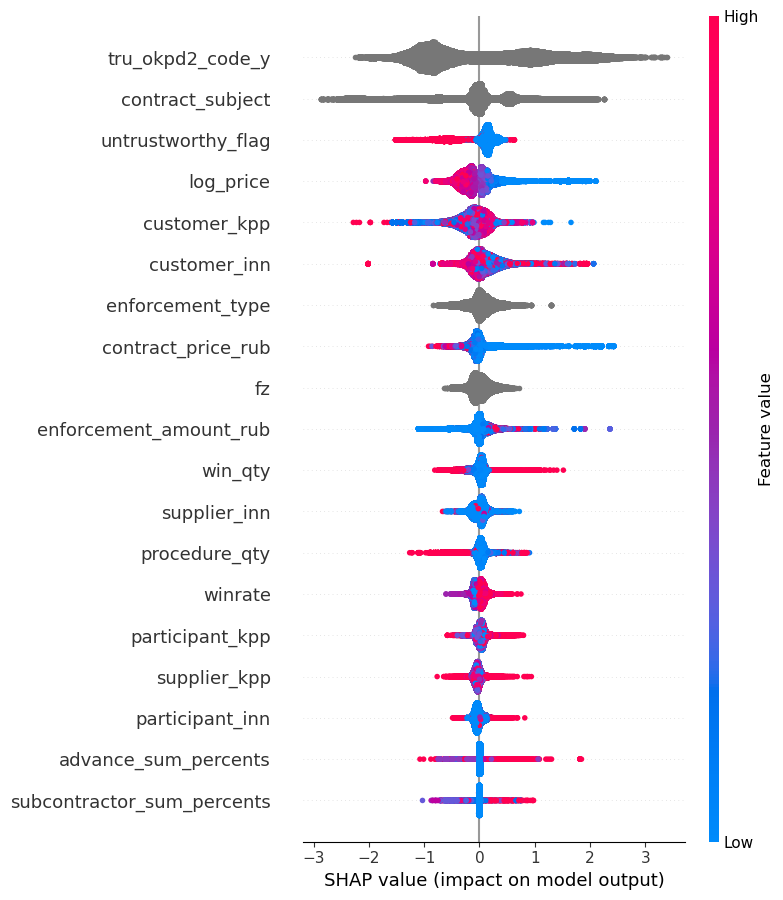

In [40]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(contract_train)
shap.summary_plot(shap_values, contract_train)

In [48]:
contract_train.iloc[:100,:].to_csv("data.csv",index = False)